## Summary


</p>
This projects trys to predict the total number of bikes people 
rented in a given hour. The target variable is the cnt column consisting
of casual and registered borrowers. 
</p>
</p>
Within this goal in mind different machine learning models are 
applied and performance evaluation with the root mean squared error
is conducted, including:
</p>
<ul>
  <li>Linear regression</li>
  <li>Decision Tree Regressor</li>
  <li>RandomForestRegressor</li>
  <li>Randomized Parameter Optimization with RandomizedSearchCV</li>
  <li>Exhaustive Parameter Optimization with GridSearchCV</li>
</ul> 
</p>
The machine learning models are accompanied with different Data Science
techniques like:
</p>
<ul>
  <li>Explorative data analysis</li>
  <li>Data visualization</li>
  <li>Data aggregation</li>
  <li>Creating train-test-sets</li>
  <li>Performance evaluation with metrics</li>
</ul> 


## Import packages

In [293]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import cm
from matplotlib.legend_handler import HandlerLine2D
import seaborn as sns

plt.rcParams['font.size'] = 11
plt.rcParams['font.style'] = 'italic'
plt.rcParams['font.family'] = 'monospace'

import numpy as np
import scipy.stats
from scipy.stats import expon
import math
import os
import pydotplus


import sklearn
print("SKlearn version: ", sklearn.__version__)


from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import Image  
from sklearn.externals.six import StringIO 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
# from sklearn.tree.export import export_text
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


SKlearn version:  0.20.3


## Import data

In [141]:
bicycle_1 = pd.read_csv("bike_rental_hour.csv", index_col=False)

## Explore data

In [142]:
bicycle_1.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32


In [143]:
bicycle_1.tail(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


In [144]:
bicycle_1.shape

(17379, 17)

In [145]:
list(bicycle_1.columns)

['instant',
 'dteday',
 'season',
 'yr',
 'mnth',
 'hr',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt']

In [146]:
bicycle_1.index

RangeIndex(start=0, stop=17379, step=1)

In [147]:
bicycle_1.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [148]:
bicycle_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


The variables are numeric. The date dteday variable is in another format.

In [149]:
print(type(bicycle_1.dteday[1] ))

<class 'str'>


It is in a string format and not in a date format.

In [150]:
bicycle_1.dteday=pd.to_datetime(bicycle_1.dteday)
print(bicycle_1.dteday.dtype)

datetime64[ns]


In [151]:
bicycle_1.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Remove the instant column, which is an identifier with none predictive value.

In [152]:
bicycle=bicycle_1.drop('instant', axis=1)
print(bicycle.columns)

Index(['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


#### Missing values?

In [153]:
bicycle.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There are not any null values

#### Data visualizations - numeric variables

In [154]:
# print(len(bicycle.columns))
bicycle_numerics = bicycle.iloc[:,np.r_[0,2:16]]
print(len(bicycle_numerics.columns))
list(bicycle.season.unique())

15


[1, 2, 3, 4]

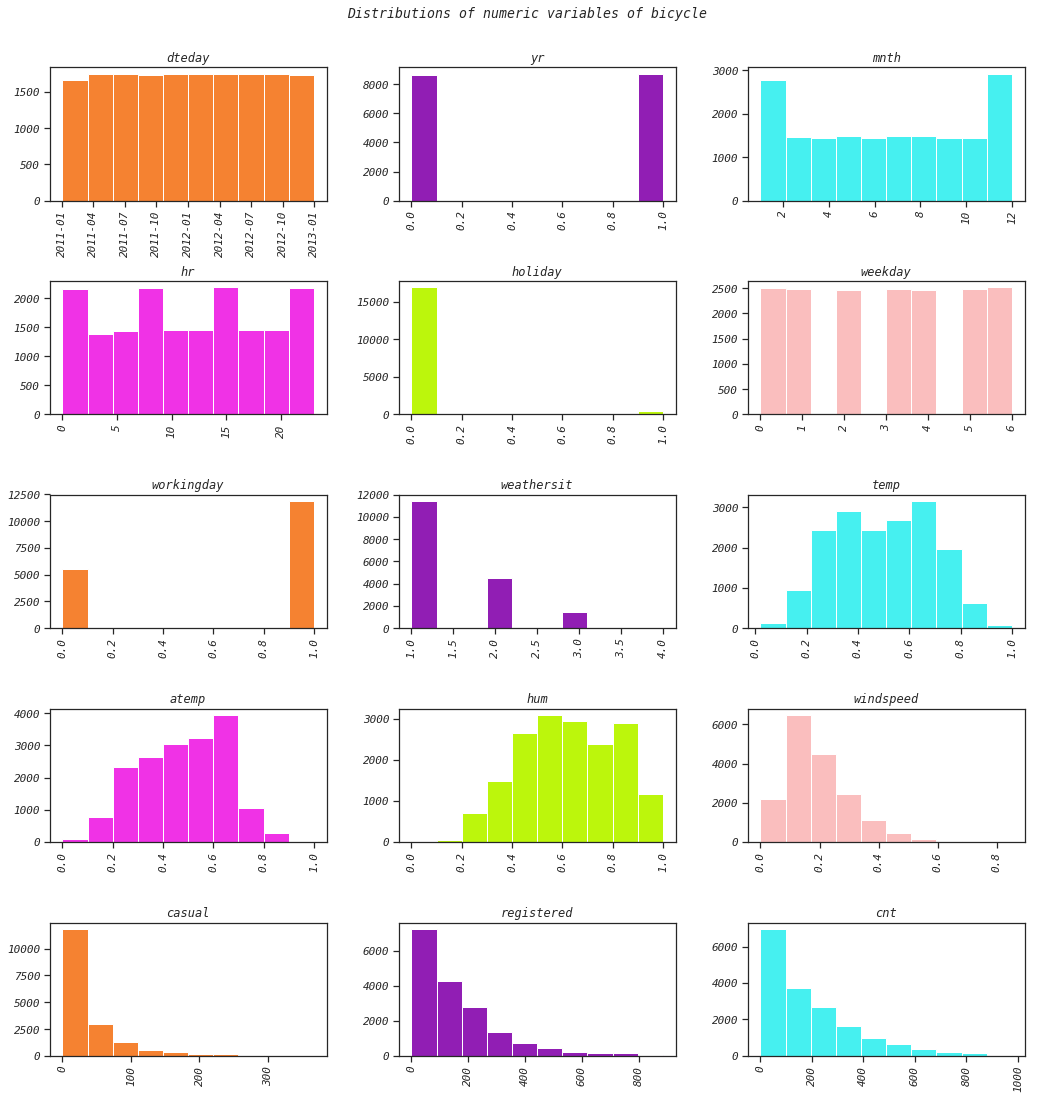

In [155]:

# Prepare color list assign each plot a different color
color_list=['#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe',
            '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe',
            '#f58231', '#911eb4', '#46f0f0', '#f032e6']

np.warnings.filterwarnings('ignore')

bicycle_numerics_names=list(bicycle_numerics.columns)

fig, axs = plt.subplots(5,3, figsize=(15,15))

plt.subplots_adjust(left=0.2, bottom=0.1, right=0.8, top=0.9, wspace=.3, hspace=0.5)
plt.tight_layout(h_pad=5, pad=3)

axs = axs.ravel()
fig.suptitle('Distributions of numeric variables of bicycle',  x=0.5, y=1.02)


for i in range(0,15):
    axs[i].hist(bicycle_numerics.iloc[:,i], color=color_list[i])
    axs[i].set_title(bicycle_numerics_names[i])
    for tick in axs[i].get_xticklabels():
        tick.set_rotation(90)    
   
plt.show()

Instant has got a uniform distribution. Weekday and others are discrete. Temp and other approaching
to a degree a normal distribution. Windspeed and other are right skewed.

In [156]:
bicycles_numerics_corr = bicycle_numerics.corr()
bicycles_numerics_corr.head()

,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
yr,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900


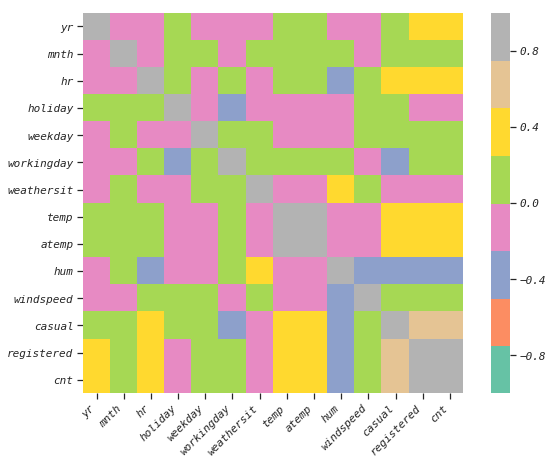

In [157]:
dimensions_1 = (10, 7)
fig, ax = plt.subplots(figsize=dimensions_1)

ax = sns.heatmap(
    bicycles_numerics_corr , 
    vmin=-1, vmax=1, center=0,
    cmap="Set2",
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Casual and registered and cnt have stronger correlations.

Cnt is the The total number of bike rentals (casual + registered). As it is the goal to predict cnt special interest is given in this variable.

Draw pairplots

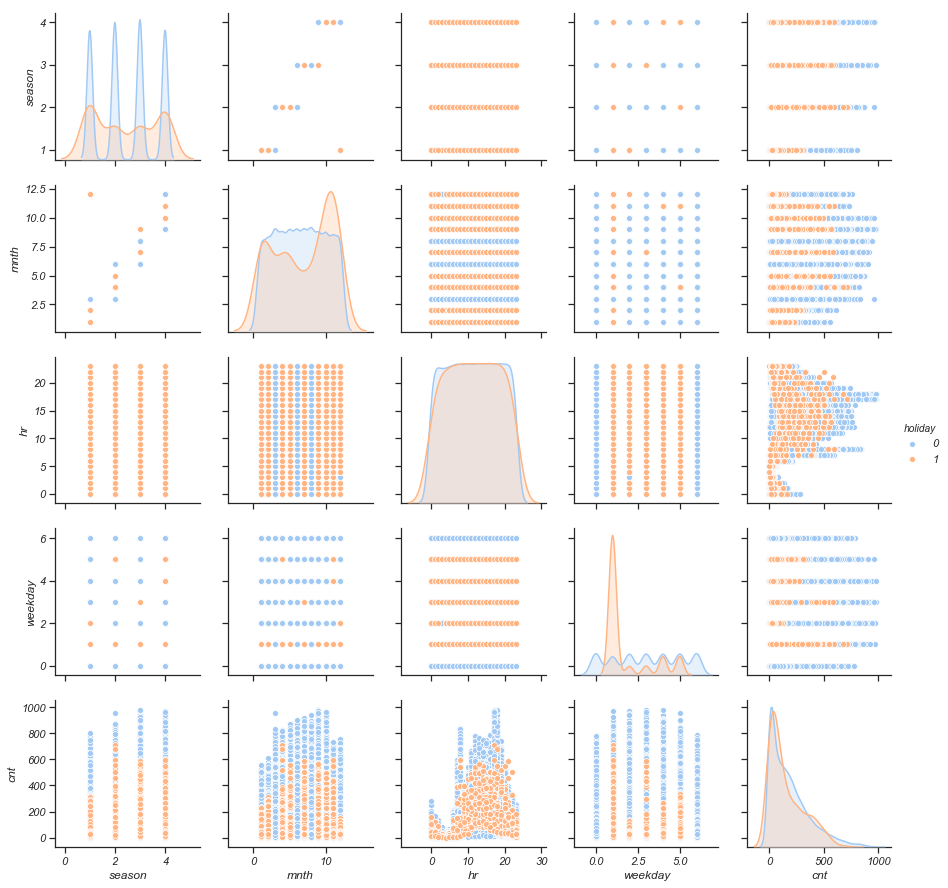

In [158]:
sns.set(style="ticks", color_codes=True)
bicycle.columns
g = sns.pairplot(bicycle, vars=['season', 'mnth', 'hr', 'weekday', 'cnt'],
                 palette="pastel", hue='holiday')

#### Aggregations

Season

In [159]:
# time_1 = ['season','yr', 'mnth', 'hr', 'weekday']
group_season=bicycle.groupby(['season'])['cnt'].\
aggregate(['mean', 'std', 'median', 'min', 'max', 'count']).round(4)
print(group_season)

            mean       std  median  min  max  count
season                                             
1       111.1146  119.2240    76.0    1  801   4242
2       208.3441  188.3625   165.0    1  957   4409
3       236.0162  197.7116   199.0    1  977   4496
4       198.8689  182.9680   155.5    1  967   4232


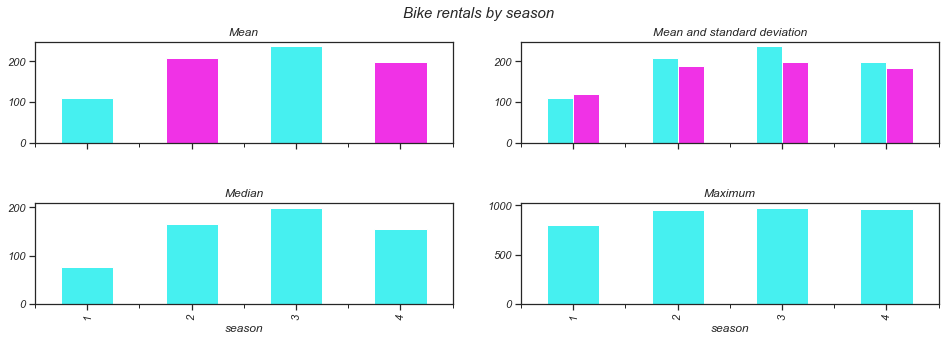

In [160]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,5), squeeze=False, sharex=True )

fig.suptitle("Bike rentals by season", fontsize=15)
plt.tight_layout(h_pad=4, pad=3)

group_season['mean'].plot(kind='bar', title="Mean", 
                           color=['#46f0f0', '#f032e6'], ax=axes[0,0])


group_season[['mean', 'std']].plot(kind='bar', title="Mean and standard deviation",
                                    stacked=False, color=['#46f0f0', '#f032e6'], ax=axes[0,1],
                                    legend=False)


group_season[['median']].plot(kind='bar', title="Median",
                               stacked=False, color=['#46f0f0', '#f032e6'], ax=axes[1,0],
                               legend=False)

group_season[['max']].plot(kind='bar', title="Maximum",
                            stacked=False, color=['#46f0f0', '#f032e6'], ax=axes[1,1],
                            legend=False)


plt.show()

Weekday

In [161]:
group_weekday = bicycle.groupby(['weekday'])['cnt'].\
aggregate(['mean', 'std', 'median', 'min', 'max', 'count']).round(4)
print(group_weekday)


             mean       std  median  min  max  count
weekday                                             
0        177.4688  168.1677     116    1  776   2502
1        183.7447  179.5142     139    1  968   2479
2        191.2389  187.8205     147    1  970   2453
3        191.1305  190.8945     143    1  977   2475
4        196.4367  188.0119     154    1  976   2471
5        196.1359  174.0769     165    1  957   2487
6        190.2098  179.8206     129    1  783   2512


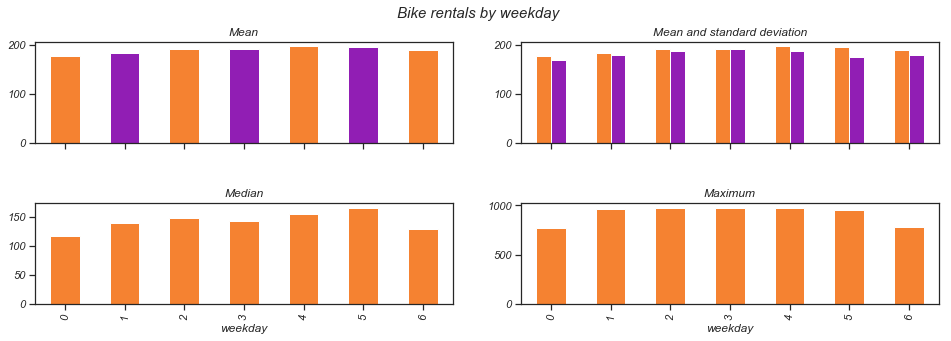

In [162]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,5), squeeze=False, sharex=True )

fig.suptitle("Bike rentals by weekday", fontsize=15)
plt.tight_layout(h_pad=4, pad=3)

group_weekday['mean'].plot(kind='bar', title="Mean", 
                           color=['#f58231', '#911eb4'], ax=axes[0,0])


group_weekday[['mean', 'std']].plot(kind='bar', title="Mean and standard deviation",
                                    stacked=False, color=['#f58231', '#911eb4'], ax=axes[0,1],
                                    legend=False)


group_weekday[['median']].plot(kind='bar', title="Median",
                               stacked=False, color=['#f58231', '#911eb4'], ax=axes[1,0],
                               legend=False)

group_weekday[['max']].plot(kind='bar', title="Maximum",
                            stacked=False, color=['#f58231', '#911eb4'], ax=axes[1,1],
                            legend=False)


plt.show()

On average the the bike rentals are similar on each weekday.

The standard deviation and dispersion is high compared to the mean.

Month

In [163]:
group_month=bicycle.groupby(['mnth'])['cnt']\
.aggregate(['mean', 'std', 'median', 'min', 'max', 'count']).round(4)

print(group_month)


          mean       std  median  min  max  count
mnth                                             
1      94.4248   99.9071    66.0    1  559   1429
2     112.8650  112.4866    82.0    1  610   1341
3     155.4107  163.5430   104.0    1  957   1473
4     187.2610  181.1379   136.0    1  822   1437
5     222.9073  187.7215   188.5    1  873   1488
6     240.5153  196.0390   203.0    1  900   1440
7     231.8199  187.4838   202.0    1  913   1488
8     238.0976  200.4446   204.0    1  941   1475
9     240.7731  214.6095   190.0    1  977   1437
10    222.1585  203.4771   174.0    1  963   1451
11    177.3354  158.9739   145.0    1  729   1437
12    142.3034  141.0807   106.0    1  759   1483


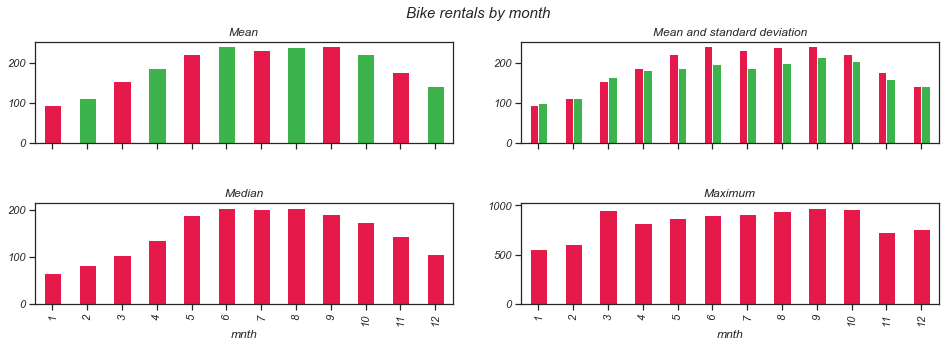

In [164]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,5), squeeze=False, sharex=True )

fig.suptitle("Bike rentals by month", fontsize=15)
plt.tight_layout(h_pad=4, pad=3)

group_month['mean'].plot(kind='bar', title="Mean", 
                           color=['#e6194b', '#3cb44b'], ax=axes[0,0])


group_month[['mean', 'std']].plot(kind='bar', title="Mean and standard deviation",
                                    stacked=False, color=['#e6194b', '#3cb44b'], ax=axes[0,1],
                                    legend=False)


group_month[['median']].plot(kind='bar', title="Median",
                               stacked=False, color=['#e6194b', '#3cb44b'], ax=axes[1,0],
                               legend=False)

group_month[['max']].plot(kind='bar', title="Maximum",
                            stacked=False, color=['#e6194b', '#3cb44b'], ax=axes[1,1],
                            legend=False)


plt.show()

Frequent bike rentals are between May and September.

#### Distribution

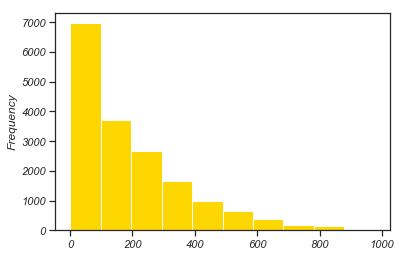

In [165]:
# plt.hist(bicycle.cnt)
bicycle.cnt.plot(kind='hist',color=['gold'])

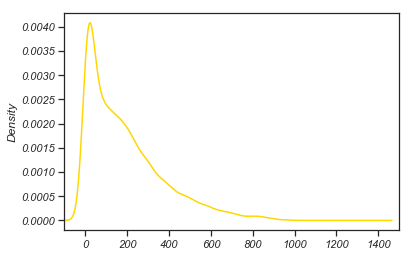

In [166]:
bicycle.cnt.plot(kind='kde',color=['gold'], xlim=(-100,1500))

Correlation between the total number of bike rentals and the other features.

In [167]:
bc=bicycle.corr()
bc.iloc[:,14].sort_values()

hum          -0.322911
weathersit   -0.142426
holiday      -0.030927
weekday       0.026900
workingday    0.030284
windspeed     0.093234
mnth          0.120638
season        0.178056
yr            0.250495
hr            0.394071
atemp         0.400929
temp          0.404772
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

In [168]:
print(bc.shape)
bc_cnt=bc.iloc[0:15,14].sort_values()
bc_cnt=bc_cnt.values.reshape(15,1)
print(bc_cnt.shape)

(15, 15)
(15, 1)


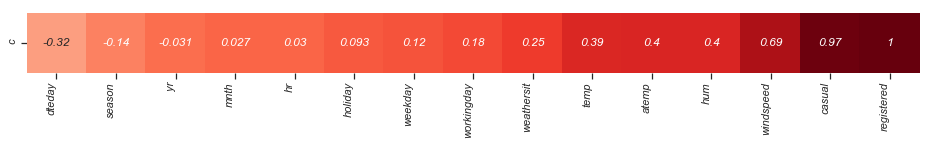

In [169]:
fig, ax = plt.subplots(figsize=(16,35))
sns.heatmap(
    bc_cnt.transpose(), 
    vmin=-1, vmax=1, center=0, annot=True,
    cbar=False,
    square=True,
    yticklabels=True,
    cmap="Reds"

)
ax.set_xticklabels(
    list(bicycle.columns),
    rotation=90,
    horizontalalignment='right'
)
ax.set_yticklabels(
    list("cnt"),
    rotation=90,
    horizontalalignment='right'
);

Casual has the highest correlation. 

Pairplot of bike rentals and selected variables.

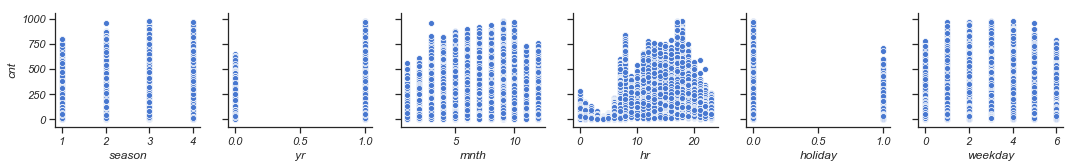

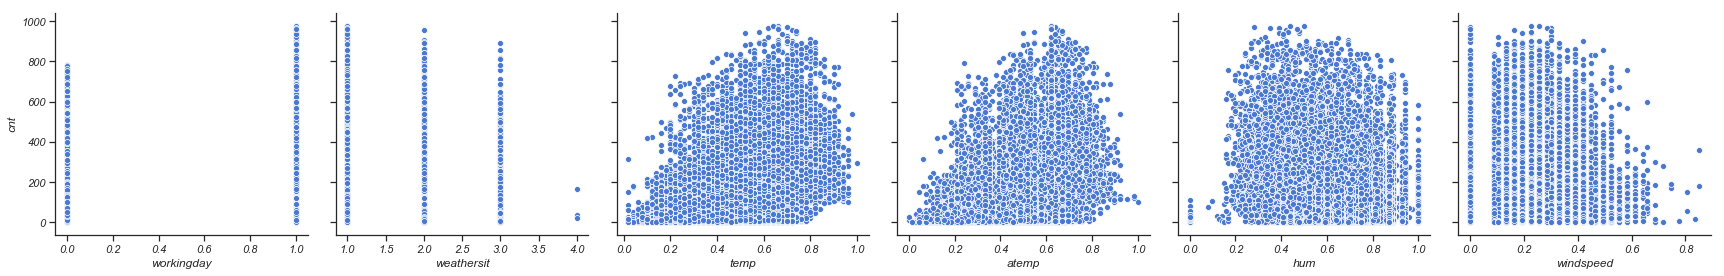

In [170]:
sns.set(style="ticks", color_codes=True)
sns.set_palette("muted")

g = sns.pairplot(bicycle,
                 x_vars=['season', 'yr', 'mnth', 
                       'hr', 'holiday', 'weekday',],
                 y_vars=['cnt'])
g = sns.pairplot(bicycle,
                 x_vars=['workingday', 'weathersit', 'temp', 
                         'atemp', 'hum', 'windspeed'],
                 y_vars=['cnt'], height=4)

Pairplot of bike rentals and selected variables colored by holiday.

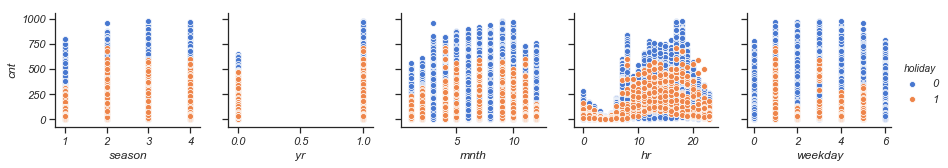

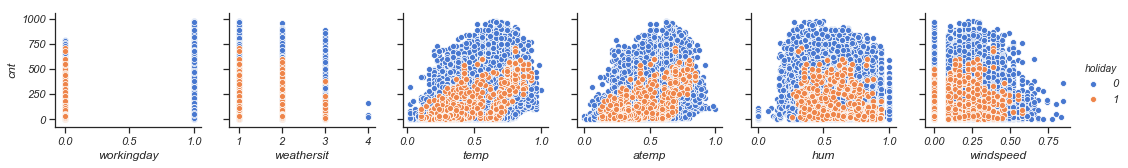

In [171]:

g = sns.pairplot(bicycle,
                 x_vars=['season', 'yr', 'mnth', 
                       'hr', 'weekday',],
                 y_vars=['cnt'], hue= 'holiday')
g = sns.pairplot(bicycle,
                 x_vars=['workingday', 'weathersit', 'temp', 
                         'atemp', 'hum', 'windspeed'],
                 y_vars=['cnt'],  hue='holiday')

In [172]:
def hour_periods(hour):
    if 6 <= hour <= 12:
        return (1)
    if 12 < hour <= 18:
        return (2)
    if 18 < hour <= 24:
        return (3)
    if 0 <= hour <= 6:
        return (4)
    

In [173]:
bicycle['hour_period']=bicycle.hr.apply(func=hour_periods)
bicycle.loc[15:25, ['hr', 'hour_period']]

,hr,hour_period
15,15,2
16,16,2
17,17,2
18,18,2
19,19,3
20,20,3
21,21,3
22,22,3
23,23,3
24,0,4


Function works.

## Data modeling

Cnt is the sum of casual and registered are. It would be redundant to include this variables as features. For this reason these are excluded as features.

In [174]:
bicycle = bicycle.drop(['registered', 'casual', 'dteday'], axis=1)

### Creating a train-test-set
Prepare to conduct supervised machine learning experiments.

#### Creating a train-test-split with pandas sample.

In [175]:
train_1 = bicycle.sample(frac=0.8, random_state=42)
print(train_1.shape)
print(list(train_1.index[:14]))

(13903, 14)
[12830, 8688, 7091, 12230, 431, 1086, 11605, 7983, 10391, 7046, 17355, 11369, 12659, 12695]


In [176]:
compare_indexes = bicycle.index.isin(train_1.index)
print(compare_indexes)
test_1 = bicycle[~compare_indexes]

print(test_1.head(2))
print(test_1.shape)
print(3476+13903)

[ True False  True ... False  True  True]
   season  yr  mnth  hr  holiday  weekday  workingday  weathersit  temp  \
1       1   0     1   1        0        6           0           1  0.22   
7       1   0     1   7        0        6           0           1  0.20   

    atemp   hum  windspeed  cnt  hour_period  
1  0.2727  0.80        0.0   40            4  
7  0.2576  0.86        0.0    3            1  
(3476, 14)
17379


In [177]:
print(bicycle.shape)

(17379, 14)


In [178]:
target_1_train = train_1['cnt']
print(target_1_train.shape)
target_1_test = test_1['cnt']
print(target_1_test.shape)

features_1_train = train_1.drop('cnt', axis=1)
print(features_1_train.shape)
features_1_test = test_1.drop('cnt', axis=1)
print(features_1_test.shape)

(13903,)
(3476,)
(13903, 13)
(3476, 13)


#### Creating a train-test-split with sklearn

In [179]:
target_2=bicycle.loc[:,'cnt']
target_2_name = 'cnt'
print(target_2_name)
print(target_2.shape)

features_2 = bicycle.drop('cnt', axis=1)
features_2_names = list(features_2.columns)
print(features_2_names)
print(features_2.shape)

cnt
(17379,)
['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'hour_period']
(17379, 13)


In [180]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(features_2, target_2, train_size=0.8, random_state=42)
print(X_train_2.shape)
print(y_train_2.shape)
print(list(X_test_2.columns))

(13903, 13)
(13903,)
['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'hour_period']


### Data model 1: Linear Regression

#### Build the model

In [181]:
# Instatiate the model
reg = LinearRegression()
print(reg)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [182]:
# Fit the model to the training data
reg.fit(X_train_2, y_train_2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [183]:
reg.get_params

<bound method BaseEstimator.get_params of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)>

In [184]:
# Coefficients of each feature in the regression equation
# regression.coef_[0] corresponds to "feature1" and regression.coef_[1] 
# corresponds to "feature2".
# https://stackoverflow.com/questions/26951880/scikit-learn-linear-regression-how-to-get-coefficients-respective-features

coefficients = list(reg.coef_)
print(len(coefficients))
print(X_train_2.shape[1])
print(coefficients)

13
13
[21.635893211706655, 84.08621789500928, -0.5579539869832075, 6.250536072680669, -23.04445131302436, 2.025086590188585, 4.022077142894671, -13.719951366261002, 99.66229773627046, 184.08854771415525, -148.5357786513947, 4.743477642939786, -52.73612300540501]


In [185]:
# Make predictions
reg_predictions = reg.predict(X_test_2)
reg_predictions[:10]

array([392.50878857, 162.17696727,  -7.04432654, 331.78400561,
       -86.02254867, -51.8324395 , 358.00819643, 128.63580314,
        60.00049685,  32.22489571])

In [186]:

dict_1 = {"test_y":y_test_2, "reg_predictions":reg_predictions}
df_1 = pd.DataFrame(data=dict_1)
df_1['difference'] = y_test_2 - reg_predictions
df_1.head()

,test_y,reg_predictions,difference
12830,425,392.508789,32.491211
8688,88,162.176967,-74.176967
7091,4,-7.044327,11.044327
12230,526,331.784006,194.215994
431,13,-86.022549,99.022549


#### Visualizing linear regression by comparing fitted with actual values.

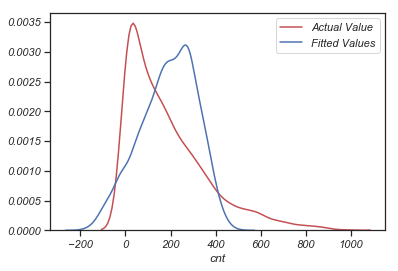

In [187]:
ax1 = sns.distplot(y_test_2, hist=False, color="r", label="Actual Value")
sns.distplot(reg_predictions, hist=False, color="b", label="Fitted Values" , ax=ax1)

#### Evaluation

The (root) mean squared error works best for continuous numerical data 
as it is used in linear regression. It is also comparable with other
algorithms. The build in method of the LinearRegression function is the
R-squared.

In [188]:
# R-squared
r_squared = reg.score(X_test_2, y_test_2)
print(round(r_squared,2))
# Medium strong positive correlation between predictions and target
# variable

0.48


In [189]:
mse_reg_1 = np.mean((reg_predictions - y_test_2)**2)
print(round(mse_reg_1,2))
rmse_reg_1 = np.sqrt(mse_reg_1)
print(round(rmse_reg_1,2))

16407.09
128.09


In [190]:
mse_reg_2 = round(mean_squared_error(y_test_2, reg_predictions),2)
print(mse_reg_2)
rmse_reg_2 = round(np.sqrt(mse_reg_2),2)
print(rmse_reg_2)

16407.09
128.09


In [191]:
min_1 = y_test_2.min()
print(min_1)
max_1 = y_test_2.max()
print(max_1)

1
977


Within a range between 1 and 977 a deviation of 134.64 of predictions
from the target values seems high. Maybe a different algorithm can
produce better results.

### Data model 2: Decision Tree Regressor

In [192]:
X_train_2.columns

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'hour_period'],
      dtype='object')

In [193]:
# Instantiate
tree_reg = DecisionTreeRegressor(random_state=34)
tree_reg.get_params

<bound method BaseEstimator.get_params of DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=34, splitter='best')>

In [194]:
# Fit the model to the training data
tree_reg.fit(X_train_2, y_train_2)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=34, splitter='best')

In [195]:
def plot_decision_tree(clf,fn, cn, maxd=None):
    # Create DOT data
    dot_data = tree.export_graphviz(clf , out_file=None, 
                                feature_names=fn,
                                class_names=cn,
                                max_depth=maxd)

    # Draw graph
    graph = pydotplus.graph_from_dot_data(dot_data)  
    # Adjust size
    graph.write_png('original_tree.png')
    graph.set_size('"16!"')
    graph.write_png('resized_tree.png')
    # Show graph
    image = Image(graph.create_png())
    return image

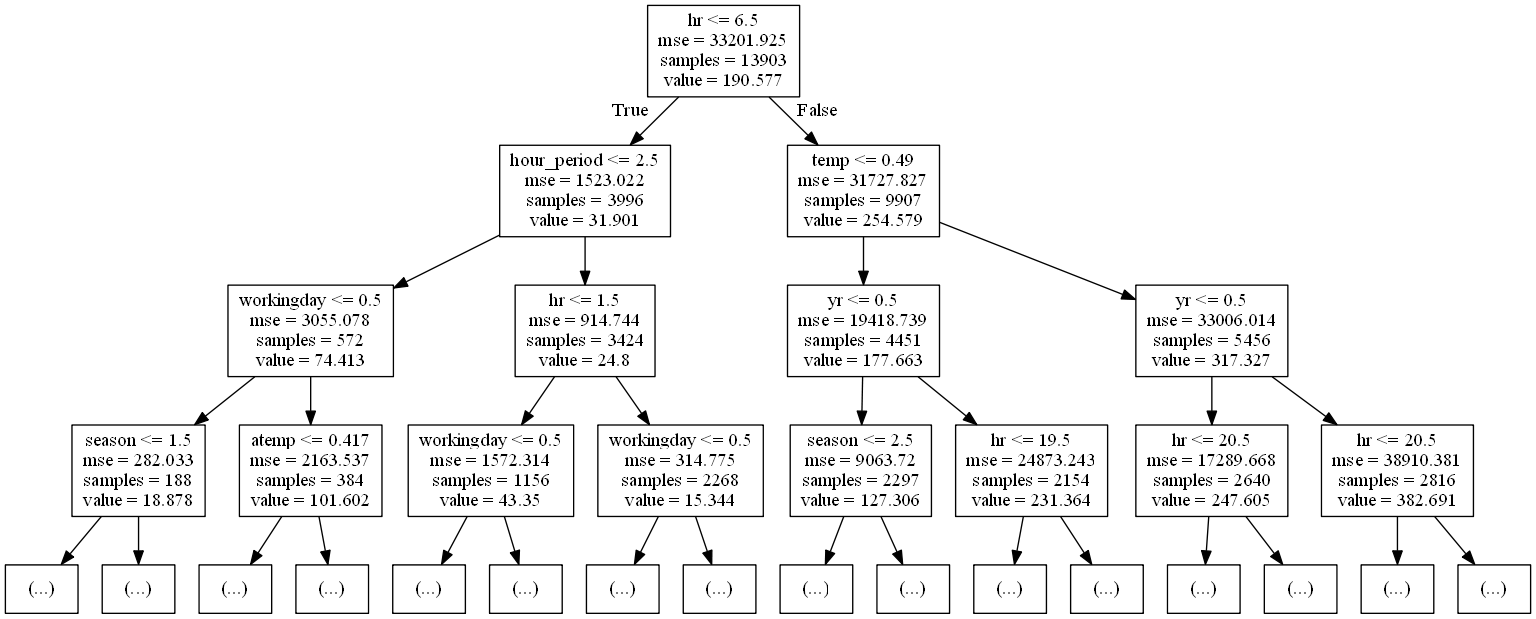

In [196]:
plot_decision_tree(tree_reg, features_2_names, target_2_name , maxd=3)

In [197]:
# Feature importance
# The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. 
# It is also known as the Gini importance.
feature_importance = tree_reg.feature_importances_

dict_2 ={'Features': X_train_2.columns, 'Importances': feature_importance}
df_2 = pd.DataFrame(data=dict_2)
print(df_2.sort_values(by="Importances", ascending=False))

       Features  Importances
3            hr     0.607643
8          temp     0.114315
1            yr     0.080781
6    workingday     0.061617
10          hum     0.028157
0        season     0.024415
9         atemp     0.021372
7    weathersit     0.017581
2          mnth     0.015825
5       weekday     0.011432
11    windspeed     0.010441
12  hour_period     0.003633
4       holiday     0.002787


In [198]:
# Make predictions on the test set
predictions_tree_reg = tree_reg.predict(X_test_2)
print(predictions_tree_reg[:5])

[360. 103.  12. 556.  19.]


#### Evaluation

In [199]:
dict_2 = {"test_y":y_test_2, "reg_tree_predictions":predictions_tree_reg}
df_2 = pd.DataFrame(data=dict_1)
df_2['difference'] = y_test_2 - predictions_tree_reg
df_2.head()

,test_y,reg_predictions,difference
12830,425,392.508789,65.0
8688,88,162.176967,-15.0
7091,4,-7.044327,-8.0
12230,526,331.784006,-30.0
431,13,-86.022549,-6.0


In [200]:
# Returns the coefficient of determination R^2 of the prediction
# score(self, X, y, sample_weight=None)

r_squared = tree_reg.score(X_test_2, y_test_2)
r_squared = round(r_squared, 2)
print(r_squared)

0.89


In [201]:
mse_tree_reg_1 = np.mean((predictions_tree_reg - y_test_2)**2)
mse_tree_reg_1 = round(mse_tree_reg_1 , 2)
print(mse_tree_reg_1)

3434.37


In [202]:
rmse_tree_reg_1 = np.sqrt(mse_tree_reg_1)
rmse_tree_reg_1 = round(rmse_tree_reg_1 , 2)
print(rmse_tree_reg_1 )

58.6


In [203]:
mse_tree_reg_2 = mean_squared_error(y_test_2, predictions_tree_reg)
mse_tree_reg_2 = round(mse_tree_reg_2 , 2)
print(mse_tree_reg_2)

3434.37


In [204]:
rmse_tree_reg_2 = np.sqrt(mse_tree_reg_2)
rmse_tree_reg_2 = round(rmse_tree_reg_2 , 2)
print(rmse_tree_reg_2 )

58.6


The model based on the DecisionTreeRegressor improved the rmse to 58.6.
On average the deviation of predicted values from target values is 58.6

In [205]:
dict_3 = {"model":['Linear Regression', 'Base DecisionTreeRegressor'], 
          "rmse":[rmse_reg_2, rmse_tree_reg_2]}
df_RMSEs = pd.DataFrame(data=dict_3)
df_RMSEs.head()

,model,rmse
0,Linear Regression,128.09
1,Base DecisionTreeRegressor,58.60


#### Hyperparameter tuning

##### Minimum sample leafs

In [206]:
# Manually changin minimum sample leafs
# The minimum number of samples required to be at a leaf node. 
# A split point at any depth will only be considered if 
# it leaves at least min_samples_leaf training samples in each 
# of the left and right branches.
clr_2 = DecisionTreeRegressor(random_state=14, min_samples_leaf=5)\
        .fit(X_train_2, y_train_2)
print(clr_2)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=5,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=14, splitter='best')


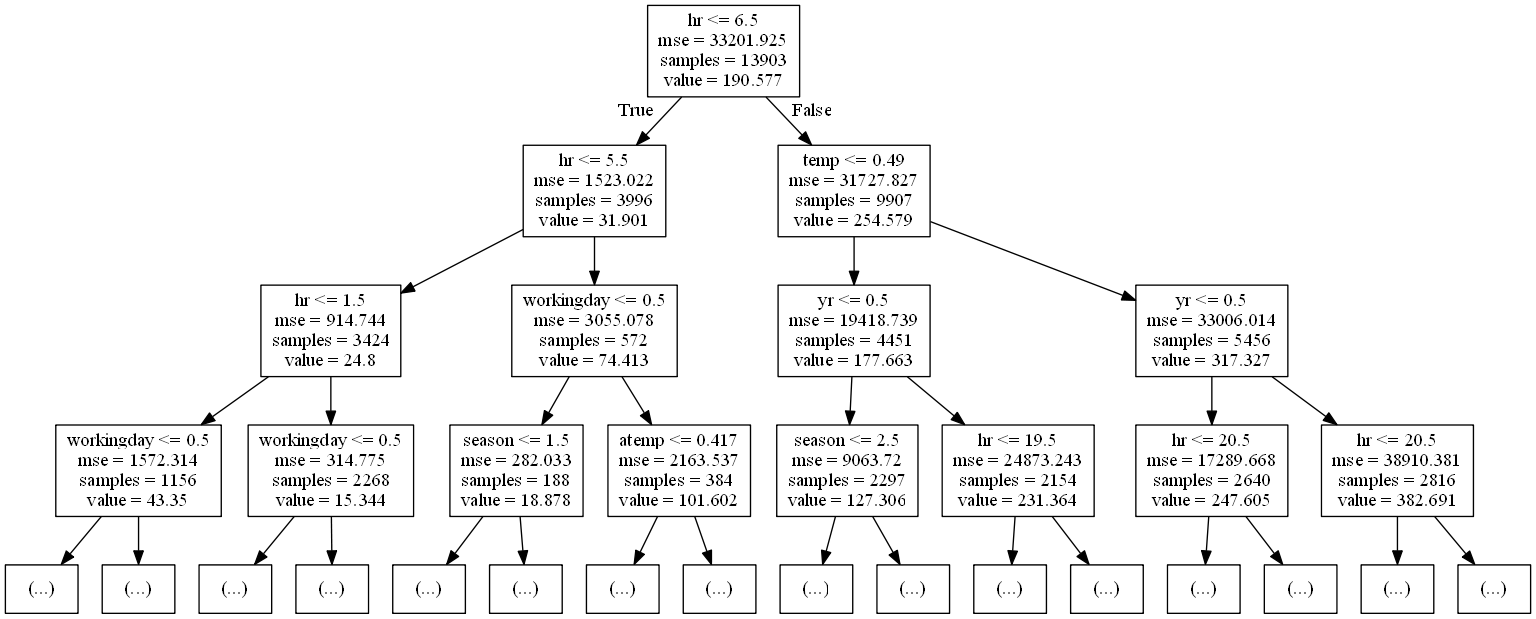

In [207]:
plot_decision_tree(clr_2, features_2_names, target_2_name , maxd=3)

In [208]:
predictions_clr_2 = clr_2.predict(X_test_2)
print(predictions_clr_2[45:49])
mse_clr_2=mean_squared_error(y_test_2, predictions_clr_2)
print(mse_clr_2)
rmse_clr_2 = round(np.sqrt(mse_clr_2),2)
rmse_clr_2

[249.33333333 175.125       85.          22.        ]
2903.557111978811


53.88

In [209]:
new_row_1={"model":"Htuned msleaf 2", "rmse":rmse_clr_2}
df_RMSEs = df_RMSEs.append(new_row_1, ignore_index=True)
df_RMSEs.sort_values(by="rmse", ascending=True)

,model,rmse
2,Htuned msleaf 2,53.88
1,Base DecisionTreeRegressor,58.60
0,Linear Regression,128.09


Tuning with minimum sample values improved the rmse. In the next step
different values of min_samples_leaf are passed on to the DecisionTreeRegressor. The goal here is to determine the estimator, which minimizes the root mean squared error. This can be done with the grid search function provided by sklearn. Here for loops are used and the results stored in lists are visualized.

In [210]:
rmse_train = []
rmse_test = []

# msl_values= np.linspace(0.1, 0.5, 5)
# print(msl_values)

msl_values_2 = np.arange(1,10,1)

for msl in msl_values_2:
    clr_3 = \
    DecisionTreeRegressor(random_state=45, min_samples_leaf=msl)
    
    clr_3.fit(X_train_2, y_train_2)
    train_predictions_clr_3 = clr_3.predict(X_train_2)
    rmse_train_value = np.sqrt(mean_squared_error(y_train_2, train_predictions_clr_3))
    rmse_train.append(round(rmse_train_value,4))
    
    test_predictions_clr_3 = clr_3.predict(X_test_2)
    rmse_test_value = \
    np.sqrt(mean_squared_error(y_test_2, test_predictions_clr_3))
    rmse_test.append(round(rmse_test_value,4))

print("RMSE's of training data: {}".format(rmse_train))
print("RMSE's of testing data: {}".format(rmse_test))

RMSE's of training data: [0.5989, 20.0892, 26.9628, 31.6232, 34.4544, 37.0594, 39.9956, 41.3524, 42.6162]
RMSE's of testing data: [58.7793, 54.6363, 53.6679, 52.9324, 53.948, 52.8497, 53.7554, 53.0775, 53.1742]


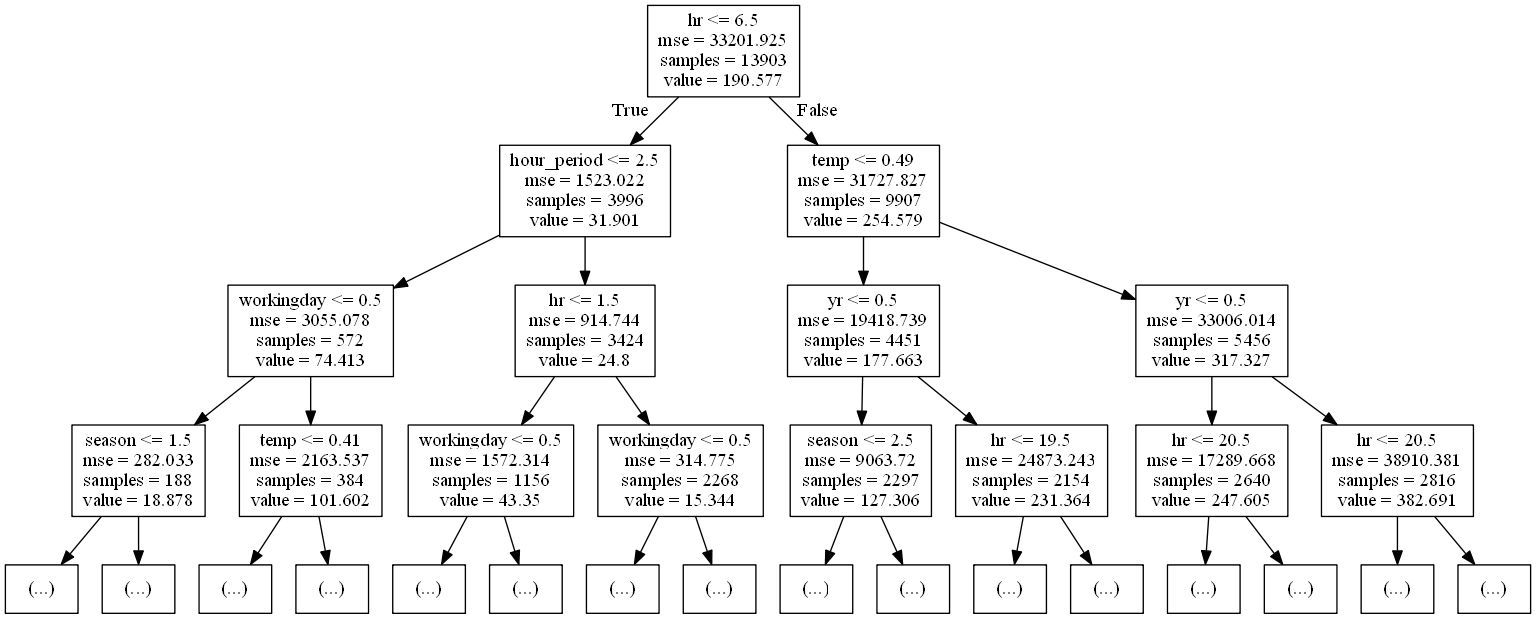

In [211]:
plot_decision_tree(clr_3, features_2_names, target_2_name , maxd=3)

In [212]:
dict_msl = {'msl-values': msl_values_2, 'train rmse\'s': rmse_train,
            'test rmse\'s': rmse_test}

df_msl = pd.DataFrame(data=dict_msl)
df_msl.sort_values(by='test rmse\'s')

,msl-values,train rmse's,test rmse's
5,6,37.0594,52.8497
3,4,31.6232,52.9324
7,8,41.3524,53.0775
8,9,42.6162,53.1742
2,3,26.9628,53.6679
6,7,39.9956,53.7554
4,5,34.4544,53.9480
1,2,20.0892,54.6363
0,1,0.5989,58.7793


Minimum sample leaf of 6 produces the lowest rmse with 52.8497.

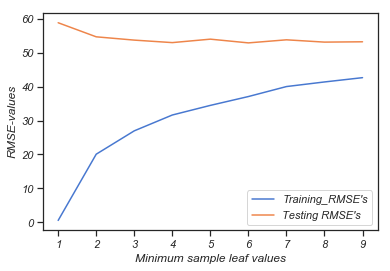

In [213]:
plt.plot(msl_values_2, rmse_train, label='Training_RMSE\'s')
plt.plot(msl_values_2, rmse_test, label='Testing RMSE\'s')
plt.xlabel("Minimum sample leaf values")
plt.ylabel("RMSE-values")
plt.legend(loc='upper_right')
# plt.legend(handler_map={line_1: HandlerLine2D(numpoints=2)})
plt.show()

The training rmse's are lower than the testing rmse's.<br>
This is to be expected. The model overfits the training data.<br>
Further hyperparameter tuning can try to decrease the overfitting.<br>
A similar approach is now taken with the max_depth parameter.


In [214]:
new_row_2={"model":"Minimum sample leafs searched", "rmse":df_msl.iloc[5,2]}
df_RMSEs = df_RMSEs.append(new_row_2, ignore_index=True)
df_RMSEs.sort_values(by="rmse", ascending=True)

,model,rmse
3,Minimum sample leafs searched,52.8497
2,Htuned msleaf 2,53.8800
1,Base DecisionTreeRegressor,58.6000
0,Linear Regression,128.0900


##### Max_depth

In [215]:
rmse_train_maxd=[]
rmse_test_maxd=[]

max_depths = np.linspace(1, 32, 32, endpoint=True)
print(max_depths)

for md in max_depths:
    clr_4 = \
    DecisionTreeRegressor(random_state=101, max_depth=md)
    clr_4.fit(X_train_2, y_train_2)
    predictions_md_train = clr_4.predict(X_train_2)
    rmse_train_maxd_value = \
    np.sqrt(mean_squared_error(y_train_2, predictions_md_train))
    rmse_train_maxd.append(round(rmse_train_maxd_value,2))
    
    
    predictions_md_test = clr_4.predict(X_test_2)
    rmse_test_maxd_value = \
    np.sqrt(mean_squared_error(y_test_2, predictions_md_test))
    rmse_test_maxd.append(round(rmse_test_maxd_value,2))
    
print("RMSEs of training data tuned with max depth: {}".format(rmse_train_maxd))
print("RMSEs of testing data tuned with max depth: {}".format(rmse_test_maxd))
    

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32.]
RMSEs of training data tuned with max depth: [151.81, 139.72, 129.46, 119.4, 108.03, 100.87, 83.62, 72.01, 58.75, 49.0, 41.36, 34.5, 28.8, 23.94, 19.98, 16.6, 13.56, 11.01, 8.49, 6.36, 4.93, 3.56, 2.7, 1.79, 1.26, 0.79, 0.66, 0.62, 0.6, 0.6, 0.6, 0.6]
RMSEs of testing data tuned with max depth: [149.8, 136.84, 127.58, 117.11, 105.6, 99.02, 82.6, 72.63, 63.95, 58.69, 57.27, 56.6, 57.89, 57.39, 58.15, 58.41, 58.49, 57.68, 58.37, 58.13, 58.22, 59.11, 58.68, 58.66, 58.75, 59.0, 59.36, 59.16, 59.21, 59.06, 59.06, 59.06]


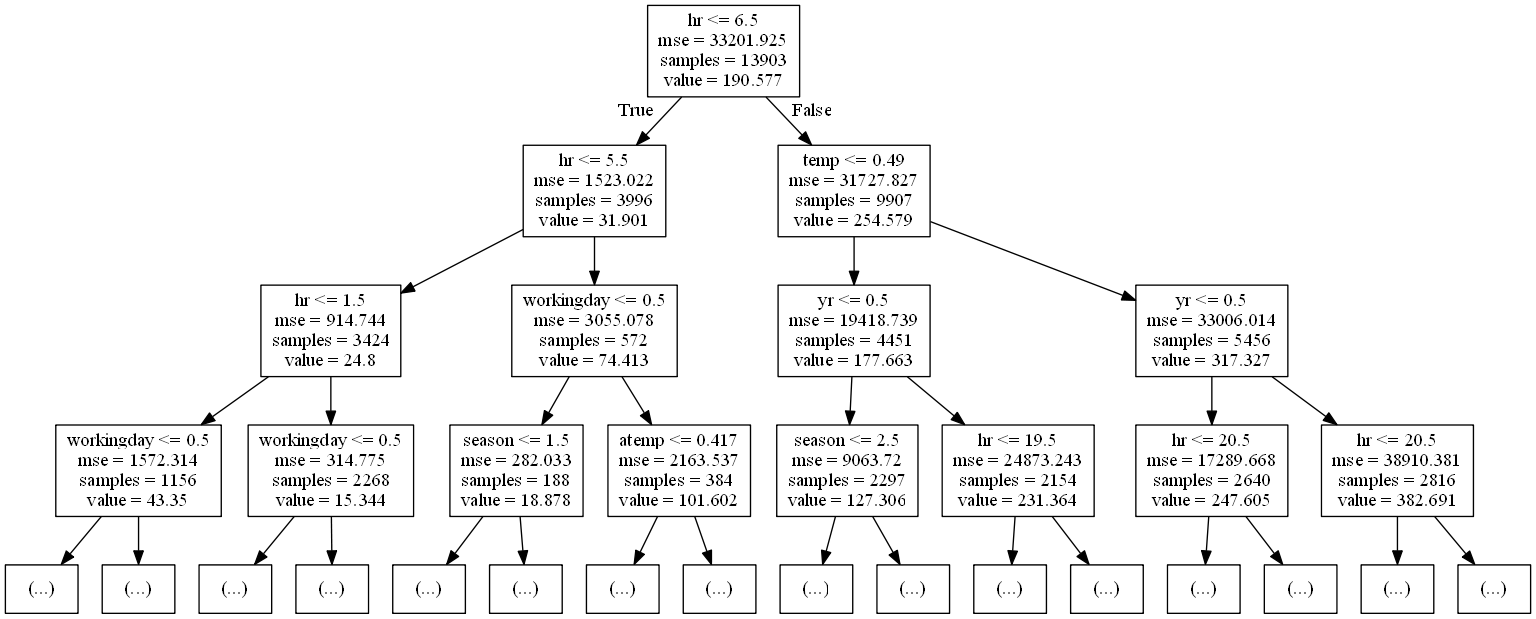

In [216]:
plot_decision_tree(clr_4, features_2_names, target_2_name , maxd=3)

In [217]:
dict_md = {'max-depths': max_depths, 'train rmse\'s': rmse_train_maxd,
           'test rmse\'s': rmse_test_maxd}

df_md = pd.DataFrame(data=dict_md)
df_md.sort_values(by='test rmse\'s').head()

,max-depths,train rmse's,test rmse's
11,12.0,34.50,56.60
10,11.0,41.36,57.27
13,14.0,23.94,57.39
17,18.0,11.01,57.68
12,13.0,28.80,57.89


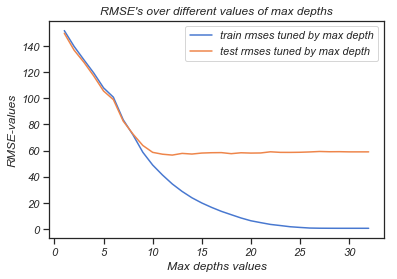

In [218]:
plt.plot(max_depths, rmse_train_maxd, label="train rmses tuned by max depth")
plt.plot(max_depths, rmse_test_maxd, label="test rmses tuned by max depth")
plt.title("RMSE\'s over different values of max depths")
plt.xlabel("Max depths values")
plt.ylabel("RMSE-values")
plt.legend(loc="lower_left")
plt.show()

Overfitting of training data starts around 10. The lowest test RMSE is 56.60 with
max depth of 11.<br>
In search for the best estimators both model can be combined to finde the 
lowest RMSE.<br>
This will afford more computational power.

In [219]:
new_row_3={"model":"Max depths searched", "rmse":df_md.iloc[11,2]}
df_RMSEs = df_RMSEs.append(new_row_3, ignore_index=True)
df_RMSEs.sort_values(by="rmse", ascending=True)

,model,rmse
3,Minimum sample leafs searched,52.8497
2,Htuned msleaf 2,53.8800
4,Max depths searched,56.6000
1,Base DecisionTreeRegressor,58.6000
0,Linear Regression,128.0900


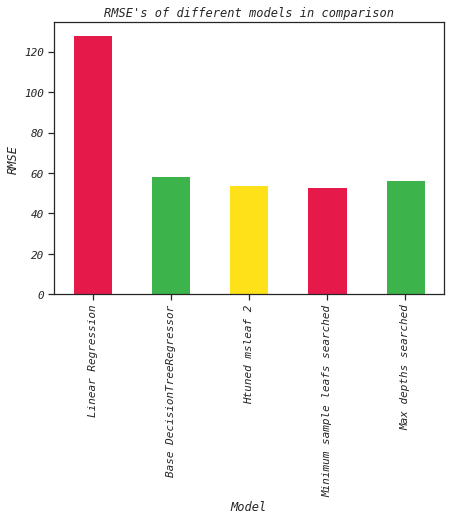

In [450]:
df_RMSEs.plot(kind="bar", x='model', y='rmse', figsize=(7,5),
                title="RMSE's of different models in comparison", 
                color=['#e6194b', '#3cb44b', '#ffe119'],
                legend=False)
plt.xlabel("Model")
plt.ylabel("RMSE")
plt.show()

Combination of minimum sample leafs and max depths.

In [220]:
rmse_train_combined=[]
rmse_test_combined=[]
params_combined=[]
max_depth_combined=[]
minimum_sample_combined=[]


for md in max_depths:
    for msl in msl_values_2:
        clr_5 = \
        DecisionTreeRegressor(random_state=101, min_samples_leaf=msl, max_depth=md)
        clr_5.fit(X_train_2, y_train_2)
        predictions_md_train = clr_5.predict(X_train_2)
        rmse_train_combined_value = \
        np.sqrt(mean_squared_error(y_train_2, predictions_md_train))
        rmse_train_combined.append(round(rmse_train_combined_value,2))


        predictions_md_test = clr_5.predict(X_test_2)
        rmse_test_combined_value = \
        np.sqrt(mean_squared_error(y_test_2, predictions_md_test))
        rmse_test_combined.append(round(rmse_test_combined_value,2))
        
        param=clr_5.get_params()
        params_combined.append(param)
        
        # Accessing the underlying tree object to extract max depth
        max_depth_value = clr_5.tree_.max_depth
        max_depth_combined.append(max_depth_value)
        
        # minimum_sample_value = clr_5.tree_.min_samples_leaf
        # minimum_sample_combined.append(max_depth_value)
        
print("RMSEs of training data tuned with combination: {}".format(rmse_train_combined[:3]))
print("RMSEs of testing data tuned with combination: {}".format(rmse_test_combined[:3]))
print("Max depth combination: {}".format(max_depth_combined[:3]))   
print("Params combination: {}".format(params_combined[:2]))    

RMSEs of training data tuned with combination: [151.81, 151.81, 151.81]
RMSEs of testing data tuned with combination: [149.8, 149.8, 149.8]
Max depth combination: [1, 1, 1]
Params combination: [{'criterion': 'mse', 'max_depth': 1.0, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': 101, 'splitter': 'best'}, {'criterion': 'mse', 'max_depth': 1.0, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': 101, 'splitter': 'best'}]


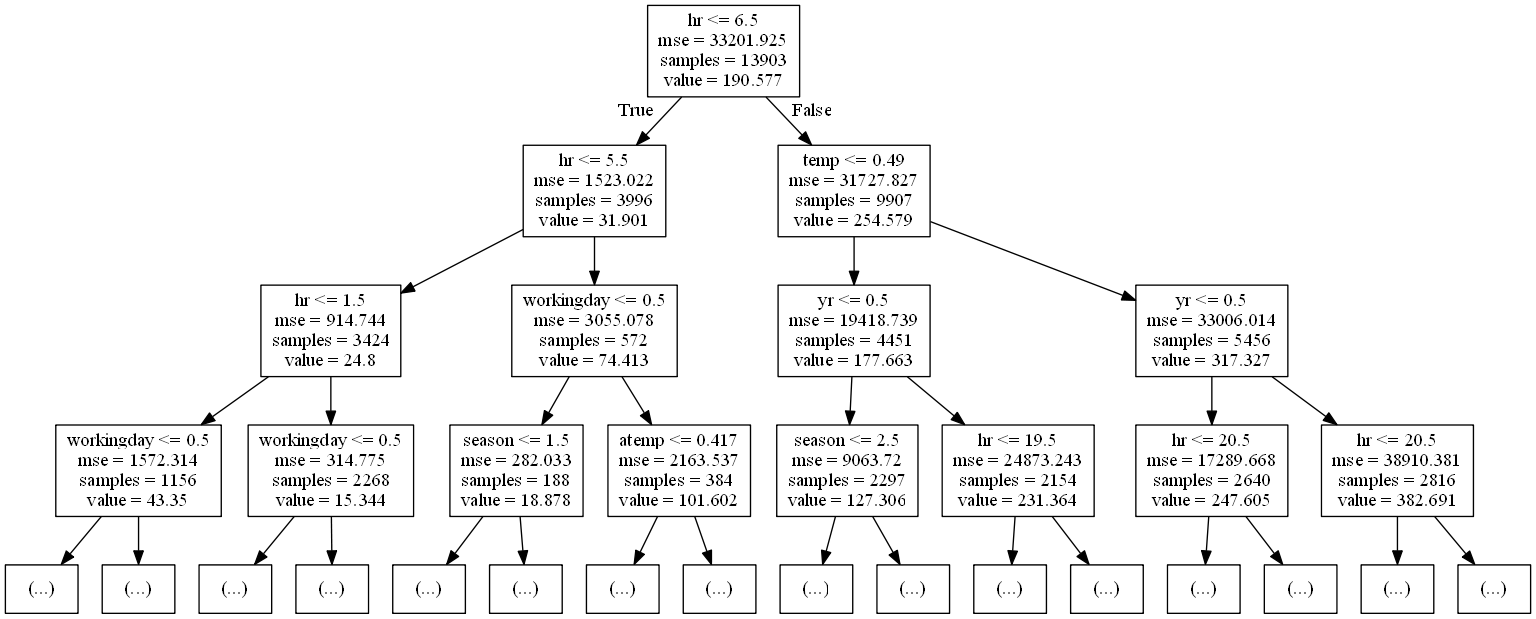

In [221]:
plot_decision_tree(clr_5, features_2_names, target_2_name , maxd=3)

In [222]:
print(len(rmse_train_combined))
print(len(rmse_test_combined))

288
288


In [223]:
dict_combined \
= {"RMSEs trained combined": rmse_train_combined, 
   "RMSEs test combined": rmse_test_combined}

df_combined = pd.DataFrame(data=dict_combined)
df_combined.sort_values(by="RMSEs test combined").head(10)

,RMSEs trained combined,RMSEs test combined
129,33.47,52.43
138,32.71,52.55
147,32.25,52.60
156,31.98,52.63
120,34.71,52.68
122,38.75,52.70
165,31.75,52.73
210,31.61,52.74
228,31.61,52.74
219,31.61,52.74


Extract minimum_sample_leaf from parameters of combined.

In [224]:
minimum_sample_leaf_combined=[]

# Iterate over list
for dictionary in params_combined:
    # Iterate over dictionaries stored in lists
    for k, v in dictionary.items():
        # print('{}: {}'.format(k, v))
    # Extract minimum_sample_leaf values
        if k == 'min_samples_leaf':
            # print(k)
            # print(v)
            minimum_sample_leaf_combined.append(v)
            
            
print(minimum_sample_leaf_combined[:5] )
print(len(minimum_sample_leaf_combined))

[1, 2, 3, 4, 5]
288


In [225]:
print(len(max_depth_combined))

288


In [226]:
df_combined['max_depth'] = max_depth_combined
print(df_combined.head())
df_combined['min_sample_leafs']=minimum_sample_leaf_combined

   RMSEs trained combined  RMSEs test combined  max_depth
0                  151.81                149.8          1
1                  151.81                149.8          1
2                  151.81                149.8          1
3                  151.81                149.8          1
4                  151.81                149.8          1


In [227]:
df_combined.sort_values(by='RMSEs test combined').head()

,RMSEs trained combined,RMSEs test combined,max_depth,min_sample_leafs
129,33.47,52.43,15,4
138,32.71,52.55,16,4
147,32.25,52.60,17,4
156,31.98,52.63,18,4
120,34.71,52.68,14,4


A combination of max depth = 15 and minimum sample leafs of 4 generates
the best result with an RMSE of 52.43 on the test data.

In [228]:
new_row_4={"model":"RMSE combined md & msl", "rmse":df_combined.iloc[129,1]}
df_RMSEs_2 = df_RMSEs.append(new_row_4, ignore_index=True)
df_RMSEs_2

,model,rmse
0,Linear Regression,128.0900
1,Base DecisionTreeRegressor,58.6000
2,Htuned msleaf 2,53.8800
3,Minimum sample leafs searched,52.8497
4,Max depths searched,56.6000
5,RMSE combined md & msl,52.4300


In [229]:
df_RMSEs_2.sort_values(by="rmse", ascending=True)

,model,rmse
5,RMSE combined md & msl,52.4300
3,Minimum sample leafs searched,52.8497
2,Htuned msleaf 2,53.8800
4,Max depths searched,56.6000
1,Base DecisionTreeRegressor,58.6000
0,Linear Regression,128.0900


In [230]:
df_RMSEs_change_1 = df_RMSEs_2.copy()
df_RMSEs_change_1['change']=df_RMSEs_change_1.rmse.diff()
df_RMSEs_change_1.sort_values(by='rmse')

,model,rmse,change
5,RMSE combined md & msl,52.4300,-4.1700
3,Minimum sample leafs searched,52.8497,-1.0303
2,Htuned msleaf 2,53.8800,-4.7200
4,Max depths searched,56.6000,3.7503
1,Base DecisionTreeRegressor,58.6000,-69.4900
0,Linear Regression,128.0900,NaN


This improved the rmse around 0.4.

In [231]:
# Heuristic approach
df_combined['md_msl'] = \
df_combined['max_depth'].map(str)\
+ df_combined['min_sample_leafs'].map(str).str.rjust(2, '-')

In [232]:
df_combined.tail(10)

,RMSEs trained combined,RMSEs test combined,max_depth,min_sample_leafs,md_msl
278,42.62,53.18,21,9,21-9
279,0.60,59.06,30,1,30-1
280,20.09,54.84,27,2,27-2
281,26.97,53.38,25,3,25-3
282,31.61,52.74,24,4,24-4
283,34.45,53.86,23,5,23-5
284,37.06,52.87,23,6,23-6
285,40.00,53.75,22,7,22-7
286,41.35,53.08,21,8,21-8
287,42.62,53.18,21,9,21-9


In [233]:
import itertools
list_22 = [item for item in itertools.islice(df_combined['md_msl'], 0, None, 10)]
print(len(list_22))

29


In [234]:
len(np.arange(0, 288, step=10))

29

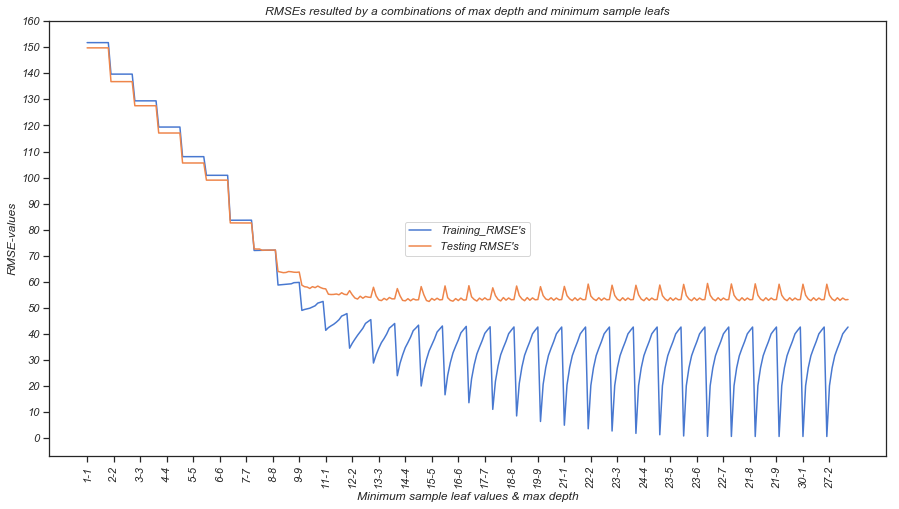

In [235]:

plt.figure(figsize=(15,8))
plt.plot(np.arange(0, 288, step=1) , rmse_train_combined, 
         label='Training_RMSE\'s')
plt.plot(np.arange(0, 288, step=1) , rmse_test_combined, 
         label='Testing RMSE\'s')
plt.xlabel("Minimum sample leaf values & max depth")
plt.ylabel("RMSE-values")
plt.legend(loc='center')
plt.xticks(np.arange(0, 288, step=10), list_22 , rotation=90)
plt.yticks(np.arange(0, 170, step=10), np.arange(0, 170, step=10) , rotation=0)
plt.title("RMSEs resulted by a combinations of max depth and minimum sample leafs")
plt.show()

The 15-4 combination offer the lowest RMSE.

There are other hyper parameters like max features 
(the number of features to consider when looking for the best split).
This is now done with grid search.

#### Model 1 using grid search

In [236]:
max_depths_2 = np.arange(8, 18, 1)
print(max_depths_2 )
max_features_1 = list(range(1,X_train_2.shape[1]))
print(max_features_1)

[ 8  9 10 11 12 13 14 15 16 17]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [237]:
# define a param grid
param_grid_1 = {'max_depth': max_depths_2, 
                'min_samples_leaf':msl_values_2,
                'max_features':max_features_1}

param_grid_1

{'max_depth': array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17]),
 'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]}

Determine the scorer

In [238]:
sklearn.metrics.SCORERS.keys()
# scoring='neg_mean_squared_error'

dict_keys(['explained_variance', 'r2', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted'])

In [239]:
grid_search_1 = \
GridSearchCV(DecisionTreeRegressor(random_state=42), 
             param_grid=param_grid_1, cv=7, 
             scoring='neg_mean_squared_error')
grid_search_1.fit(X_train_2, y_train_2)

GridSearchCV(cv=7, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17]), 'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]), 'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [240]:
grid_search_1_cv_results = grid_search_1.cv_results_
grid_search_1_cv_results.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_max_features', 'param_min_samples_leaf', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'split5_train_score', 'split6_train_score', 'mean_train_score', 'std_train_score'])

In [241]:
# grid_search_1_cv_results

In [242]:
mse_grid_search_1_train = grid_search_1.score(X_train_2, y_train_2)
mse_grid_search_1_test = grid_search_1.score(X_test_2, y_test_2)
print(mse_grid_search_1_train)
print(mse_grid_search_1_test)

-1290.1530337250242
-2793.3787738693827


In [243]:
rmse_grid_search_1_train = np.sqrt(abs(mse_grid_search_1_train))
rmse_grid_search_1_test = np.sqrt(abs(mse_grid_search_1_test))
print(rmse_grid_search_1_train)
print(rmse_grid_search_1_test)

35.91870033457536
52.85242448430708


In [244]:
grid_search_1_preds = grid_search_1.predict(X_test_2)
grid_search_1_mse = \
round(np.sqrt(mean_squared_error(y_test_2, grid_search_1_preds)),2)
print ('Evaluation of grid_search_1 with rmse: {}'.format(grid_search_1_mse))

Evaluation of grid_search_1 with rmse: 52.85


The rmse provided by the SCORER function is identical to
the rmse calculated.

In [245]:
print(grid_search_1.best_estimator_)
# best_params_ defined in the dictionary
print(grid_search_1.best_params_)
# best_score_: Mean cross-validated score of the best_estimator
grid_search_1_best_score=grid_search_1.best_score_
print(grid_search_1_best_score)
rmse_grid_search_1_best_score = np.sqrt(abs(grid_search_1_best_score))
print(rmse_grid_search_1_best_score)

DecisionTreeRegressor(criterion='mse', max_depth=17, max_features=12,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=5,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')
{'max_depth': 17, 'max_features': 12, 'min_samples_leaf': 5}
-3067.123688047432
55.381618683886735


best_score and score are not the same methods.
According to the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV.score">doc</a> best_score_  is the mean cross-validated score 
of the best_estimator.
score on the other hand returns the score on the given data, 
if the estimator has been refit. As a mean of different values it is to be expected higher than the refitted score.


In [246]:
params_grid_search_1=grid_search_1.get_params()
print(type(params_grid_search_1))
print(params_grid_search_1)

<class 'dict'>
{'cv': 7, 'error_score': 'raise-deprecating', 'estimator__criterion': 'mse', 'estimator__max_depth': None, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__presort': False, 'estimator__random_state': 42, 'estimator__splitter': 'best', 'estimator': DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best'), 'fit_params': None, 'iid': 'warn', 'n_jobs': None, 'param_grid': {'max_depth': array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17]), 'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]), 'max_features': [

In [247]:
new_row_5={"model":"grid search 1", "rmse":grid_search_1_mse}
df_RMSEs_2 = df_RMSEs_2.append(new_row_5, ignore_index=True)
new_row_6={"model":"grid search 1 best_score", 
           "rmse":rmse_grid_search_1_best_score}
df_RMSEs_2 = df_RMSEs_2.append(new_row_6, ignore_index=True)
df_RMSEs_2

,model,rmse
0,Linear Regression,128.090000
1,Base DecisionTreeRegressor,58.600000
2,Htuned msleaf 2,53.880000
3,Minimum sample leafs searched,52.849700
4,Max depths searched,56.600000
5,RMSE combined md & msl,52.430000
6,grid search 1,52.850000
7,grid search 1 best_score,55.381619


In [248]:
df_RMSEs_change_2 = df_RMSEs_2.copy()
df_RMSEs_change_2['change']=df_RMSEs_change_2.rmse.diff()
df_RMSEs_change_2.sort_values(by='rmse')

,model,rmse,change
5,RMSE combined md & msl,52.430000,-4.170000
3,Minimum sample leafs searched,52.849700,-1.030300
6,grid search 1,52.850000,0.420000
2,Htuned msleaf 2,53.880000,-4.720000
7,grid search 1 best_score,55.381619,2.531619
4,Max depths searched,56.600000,3.750300
1,Base DecisionTreeRegressor,58.600000,-69.490000
0,Linear Regression,128.090000,NaN


Grid search produced not immediately a better result 
than the combined model. Of course further tuning can be done.
Interestingly is to see how maximum features works as a stand alone model.


#### Max_features

In [249]:
rmse_train_maxfeat=[]
rmse_test_maxfeat=[]

max_features_1 = list(range(1,X_train_2.shape[1]))

for mf in max_features_1:
    clr_6 = \
    DecisionTreeRegressor(random_state=101, max_features=mf)
    clr_6.fit(X_train_2, y_train_2)
    predictions_mf_train = clr_6.predict(X_train_2)
    rmse_train_mf_value = \
    np.sqrt(mean_squared_error(y_train_2, predictions_mf_train))
    rmse_train_maxfeat.append(round(rmse_train_mf_value,2))
    
    
    predictions_mf_test = clr_6.predict(X_test_2)
    rmse_test_mf_value = \
    np.sqrt(mean_squared_error(y_test_2, predictions_mf_test))
    rmse_test_maxfeat.append(round(rmse_test_mf_value,2))
    
print("RMSEs of training data tuned with max features: {}".\
      format(rmse_train_maxfeat))
print("RMSEs of testing data tuned with max features: {}".\
      format(rmse_test_maxfeat))
    

RMSEs of training data tuned with max features: [0.6, 0.61, 0.6, 0.61, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6]
RMSEs of testing data tuned with max features: [120.88, 110.58, 83.86, 80.12, 75.25, 68.25, 66.3, 61.62, 59.16, 58.0, 59.96, 60.09]


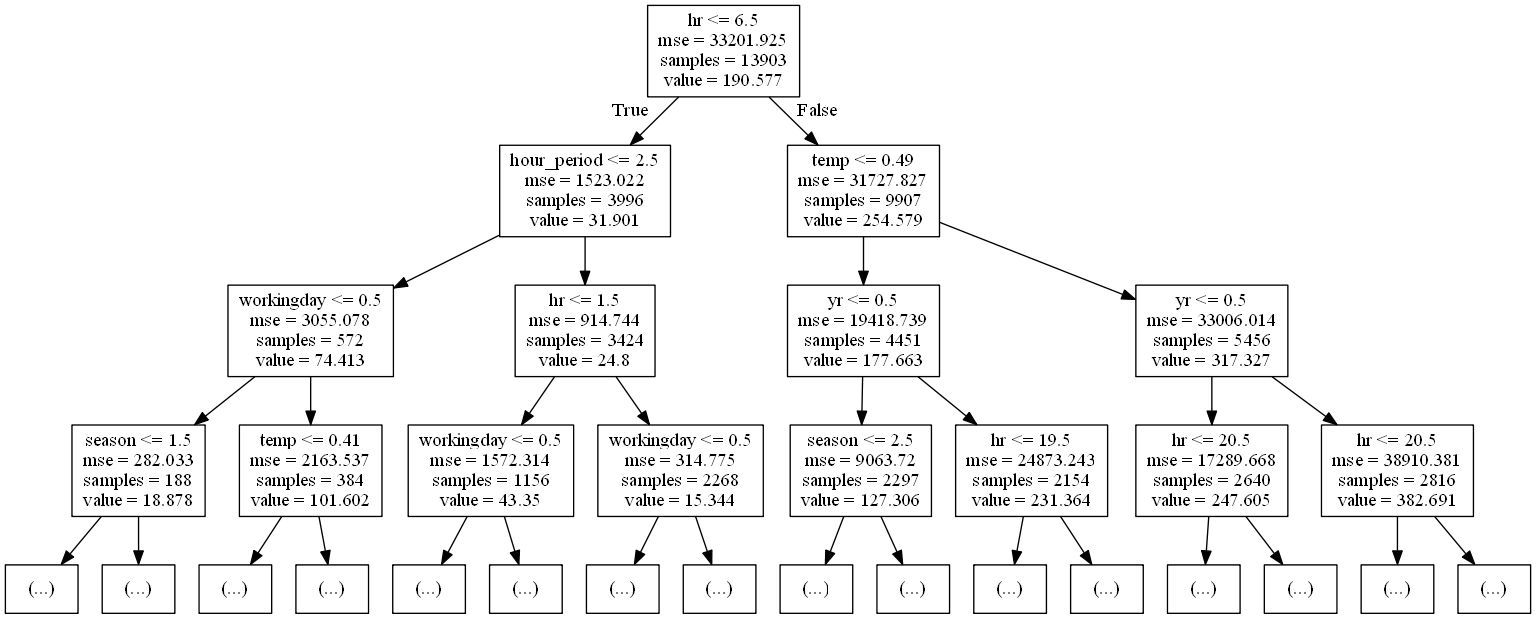

In [250]:
plot_decision_tree(clr_6, features_2_names, target_2_name , maxd=3)

In [251]:
rmse_min_maxfeat = np.min(rmse_test_maxfeat)
rmse_min_maxfeat

58.0

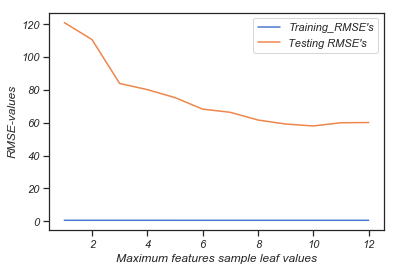

In [252]:
plt.plot(max_features_1, rmse_train_maxfeat, label='Training_RMSE\'s')
plt.plot(max_features_1, rmse_test_maxfeat, label='Testing RMSE\'s')
plt.xlabel("Maximum features sample leaf values")
plt.ylabel("RMSE-values")
plt.legend(loc='upper_right')
# plt.legend(handler_map={line_1: HandlerLine2D(numpoints=2)})
plt.show()



In [253]:
new_row_7={"model":"rmse_min_maxfeat", 
           "rmse":rmse_min_maxfeat}
df_RMSEs_2 = df_RMSEs_2.append(new_row_7, ignore_index=True)
df_RMSEs_2

,model,rmse
0,Linear Regression,128.090000
1,Base DecisionTreeRegressor,58.600000
2,Htuned msleaf 2,53.880000
3,Minimum sample leafs searched,52.849700
4,Max depths searched,56.600000
5,RMSE combined md & msl,52.430000
6,grid search 1,52.850000
7,grid search 1 best_score,55.381619
8,rmse_min_maxfeat,58.000000


The maximum feature stand alone does not produce better results on
it's own.

In [254]:
df_RMSEs_change_3 = df_RMSEs_2.copy()
df_RMSEs_change_3['change']=df_RMSEs_change_3.rmse.diff()
df_RMSEs_change_3.sort_values(by='rmse')

,model,rmse,change
5,RMSE combined md & msl,52.430000,-4.170000
3,Minimum sample leafs searched,52.849700,-1.030300
6,grid search 1,52.850000,0.420000
2,Htuned msleaf 2,53.880000,-4.720000
7,grid search 1 best_score,55.381619,2.531619
4,Max depths searched,56.600000,3.750300
8,rmse_min_maxfeat,58.000000,2.618381
1,Base DecisionTreeRegressor,58.600000,-69.490000
0,Linear Regression,128.090000,NaN


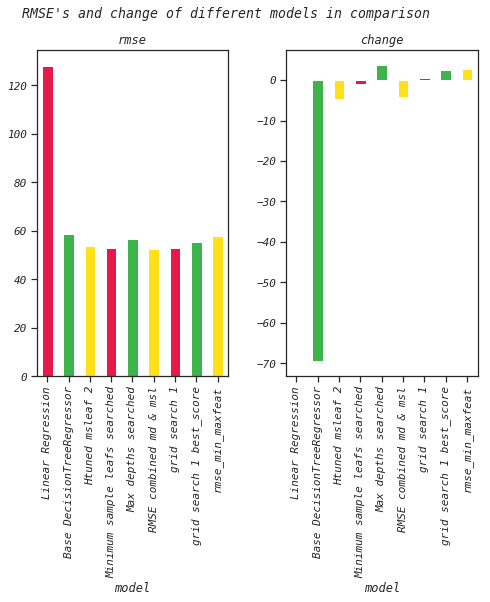

In [449]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7,6))
plt.subplots_adjust(bottom=None, right=1, 
                top=None, wspace=0.3, hspace=None)
plt.suptitle("RMSE's and change of different models in comparison",
             horizontalalignment ='center')

df_RMSEs_change_3.plot(kind="bar", 
                x='model',
                y='rmse',
                ax=ax1,
                color=['#e6194b', '#3cb44b', '#ffe119'],
                legend=False,
                subplots=True)
df_RMSEs_change_3.plot(kind="bar",
                x='model',
                y='change',
                ax=ax2,
                
                color=['#e6194b', '#3cb44b', '#ffe119'],
                legend=False,
                subplots=True)
plt.show()

### Data model 2: Random Forests - RandomForestRegressor

<p>According to the<a href https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html>
doc</a></p>
<p>
A random forest is a meta estimator that fits a number of classifying 
decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement if 
bootstrap=True (default).
</p>

#### Base model (without any tuning of the hyper parameters)

In [255]:
# Instantiated
rfr_1=RandomForestRegressor(random_state=47)
# Fit algorithm to the data
rfr_1 = rfr_1.fit(X_train_2,  y_train_2)


In [256]:
rfr_1.get_params

<bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=47, verbose=0, warm_start=False)>

Look and visualize one tree

In [257]:
# The default value of number of estimators or trees is 10.
estimator_1 = rfr_1.estimators_[8]
estimator_1 

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=891657275, splitter='best')

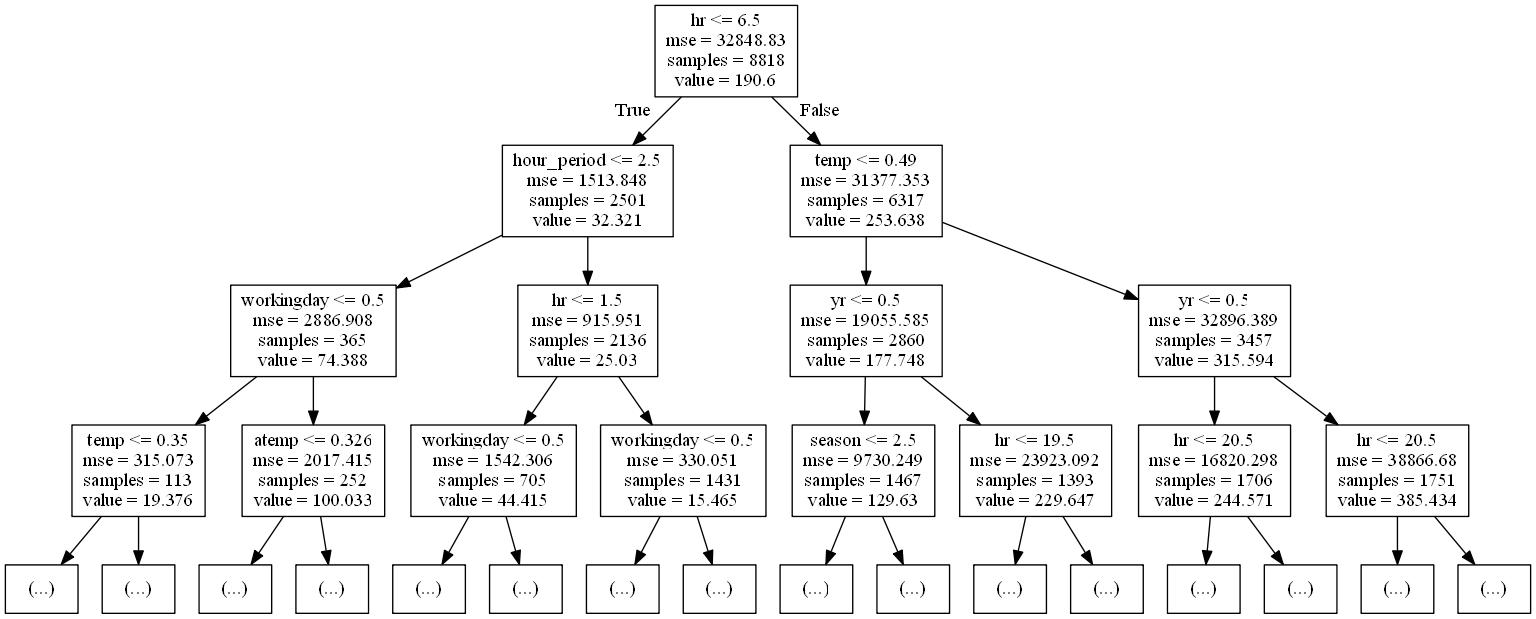

In [258]:
# This decision tree serves only as illustration because as stated above
# random forests does averaging.
plot_decision_tree(estimator_1 , features_2_names, target_2_name , maxd=3)
# The last rows of the tree indicates that the tree goes on 
# but is not displayed here

In [259]:
# Make predictions
rfr_1_predictions = rfr_1.predict(X_test_2)
print(rfr_1_predictions[:5])

[388.   84.5  10.5 570.2  13.4]


In [260]:
# Evaluate
mse_rfr_1 = round(np.mean((rfr_1_predictions - y_test_2)**2),2)
print(mse_rfr_1)
rmse_rfr_1 = round(np.sqrt(mse_rfr_1),2)
print(rmse_rfr_1)

1943.14
44.08


The random forest model in the base version improved the rmse
significantly.

In [261]:
rfr_1.score(X_test_2, y_test_2)

0.93863515954506

With this r-squared ca. 93 percent of the total variability
in the predictions is explained by the features.

Further investigations into the trees.

In [262]:
# Apply trees in the forest to X, return leaf indices.
rfr_1.apply(X_test_2)

array([[15758, 15511, 15799, ..., 15694, 15781, 15675],
       [ 9258,  8993,  9339, ...,  8869,  9362,  8889],
       [ 2544,  2526,  3200, ...,  3064,  3164,  2313],
       ...,
       [ 4418,  4629,  4547, ...,  4606,  4644,  4476],
       [ 8691, 13466,  8618, ..., 13187,  8509, 13163],
       [ 6767,  6729,  6833, ...,  6748,  6884,  6557]], dtype=int64)

In [263]:
# indicator : sparse csr array, shape = [n_samples, n_nodes]
# Return a node indicator matrix where non zero elements indicates 
# that the samples goes through the nodes.
rfr_1.decision_path(X_test_2)

(<3476x166998 sparse matrix of type '<class 'numpy.int64'>'
 	with 576831 stored elements in Compressed Sparse Row format>,
 array([     0,  16723,  33242,  49993,  66674,  83395, 100124, 116783,
        133542, 150287, 166998], dtype=int32))

In [264]:
rfr_1_fi = rfr_1.feature_importances_
dict_444 = {'feature':X_train_2.columns, 'importance': rfr_1_fi}
df_444 = pd.DataFrame(data=dict_444).sort_values(by='importance', 
                                                 ascending=False)
df_444['cumulative'] = df_444['importance'].cumsum()
df_444

,feature,importance,cumulative
3,hr,0.599873,0.599873
8,temp,0.117728,0.717602
1,yr,0.082405,0.800007
6,workingday,0.062227,0.862233
10,hum,0.026438,0.888672
0,season,0.022374,0.911046
9,atemp,0.021382,0.932428
7,weathersit,0.018013,0.950441
2,mnth,0.015002,0.965443
5,weekday,0.012388,0.977830


temp and hr are the most important feature in this data model.

In [265]:
new_row_8={"model":"random forest base", 
           "rmse":rmse_rfr_1}
df_RMSEs_2 = df_RMSEs_2.append(new_row_8, ignore_index=True)
df_RMSEs_2

,model,rmse
0,Linear Regression,128.090000
1,Base DecisionTreeRegressor,58.600000
2,Htuned msleaf 2,53.880000
3,Minimum sample leafs searched,52.849700
4,Max depths searched,56.600000
5,RMSE combined md & msl,52.430000
6,grid search 1,52.850000
7,grid search 1 best_score,55.381619
8,rmse_min_maxfeat,58.000000
9,random forest base,44.080000


In [266]:
df_RMSEs_change_4 = df_RMSEs_2.copy()
df_RMSEs_change_4['change']=df_RMSEs_change_4.rmse.diff()
df_RMSEs_change_4.sort_values(by='rmse')

,model,rmse,change
9,random forest base,44.080000,-13.920000
5,RMSE combined md & msl,52.430000,-4.170000
3,Minimum sample leafs searched,52.849700,-1.030300
6,grid search 1,52.850000,0.420000
2,Htuned msleaf 2,53.880000,-4.720000
7,grid search 1 best_score,55.381619,2.531619
4,Max depths searched,56.600000,3.750300
8,rmse_min_maxfeat,58.000000,2.618381
1,Base DecisionTreeRegressor,58.600000,-69.490000
0,Linear Regression,128.090000,NaN


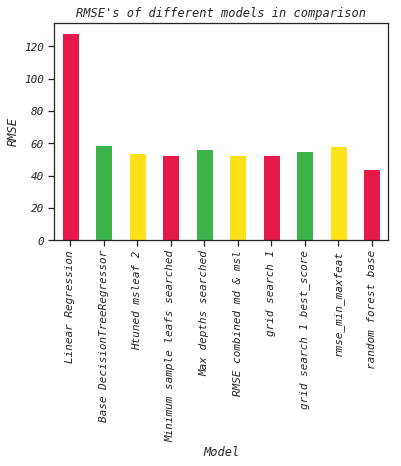

In [452]:
df_RMSEs_change_4.plot(kind="bar", x='model', y='rmse', figsize=(6,4),
                title="RMSE's of different models in comparison", 
                color=['#e6194b', '#3cb44b', '#ffe119'],
                legend=False)
plt.xlabel("Model")
plt.ylabel("RMSE")
plt.show()

Will hyperparameter tuning result in further improvements?

#### Hyperparameter tuning

In [267]:
# selecting some values based on experience
rfr_2 = \
RandomForestRegressor(n_estimators=150)
rfr_2 = rfr_2 .fit(X_train_2,  y_train_2)

In [268]:
rfr_2.get_params

<bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)>

In [269]:
rfr_2_estimators = rfr_2.estimators_
print(type(rfr_2_estimators ))
print(len(rfr_2_estimators ))

rfr_2_estimators_2_121 = [rfr_2_estimators[i] for i in [2,121]]
print(rfr_2_estimators_2_121 )

<class 'list'>
150
[DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=220219057, splitter='best'), DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=68058411, splitter='best')]


In [270]:
rfr_2_predictions = rfr_2.predict(X_test_2)

In [271]:
print(len(rfr_2_predictions))
print(rfr_2_predictions[:3])
print(type(rfr_2_predictions))
[rfr_2_predictions[i] for i in [12, 134, 145, 1017, 896, 3000, 3450]]

3476
[372.67333333  97.08        11.        ]
<class 'numpy.ndarray'>


[598.4733333333334,
 535.9333333333333,
 65.44,
 218.38666666666666,
 181.69333333333333,
 2.44,
 252.96666666666667]

In [272]:
rfr_2_mse = round(mean_squared_error(y_test_2, rfr_2_predictions),2)
print(rfr_2_mse)
rfr_2_rmse = round(np.sqrt(rfr_2_mse), 2)
print(rfr_2_rmse)

1741.19
41.73


In [273]:
new_row_9={"model":"rf hyper nest 150", 
           "rmse":rfr_2_rmse}
df_RMSEs_2 = df_RMSEs_2.append(new_row_9, ignore_index=True)
df_RMSEs_2.sort_values(by='rmse', ascending=True)

,model,rmse
10,rf hyper nest 150,41.730000
9,random forest base,44.080000
5,RMSE combined md & msl,52.430000
3,Minimum sample leafs searched,52.849700
6,grid search 1,52.850000
2,Htuned msleaf 2,53.880000
7,grid search 1 best_score,55.381619
4,Max depths searched,56.600000
8,rmse_min_maxfeat,58.000000
1,Base DecisionTreeRegressor,58.600000


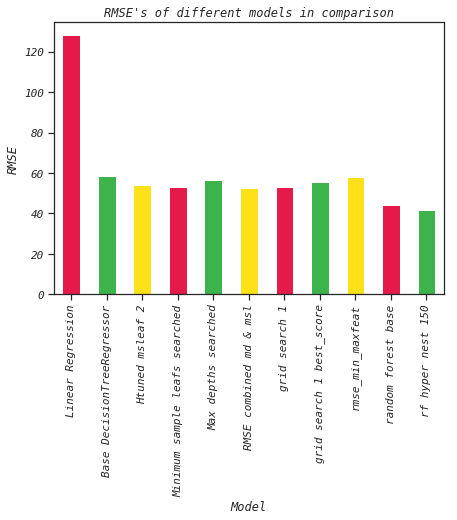

In [417]:
df_RMSEs_2.plot(kind="bar", x='model', y='rmse', figsize=(7,5),
                title="RMSE's of different models in comparison", 
                color=['#e6194b', '#3cb44b', '#ffe119'],
                legend=False)
plt.xlabel("Model")
plt.ylabel("RMSE")
plt.show()

Increasing the number of trees improves the rmse.<br>
Is it going to further decrease the rmse, 
if the number of trees is further increased.

In [274]:
rmse_rfr_2_train_nestimators = []
rmse_rfr_2_test_nestimators = []

n_estimator_list_rfr_2 = np.arange(100,350,step=50, dtype='int')
print(n_estimator_list_rfr_2)
print(type(n_estimator_list_rfr_2))

n_estimator_list_rfr_3 = \
np.append(n_estimator_list_rfr_2, [10,70,320, 1000])

n_estimator_list_rfr_3 = \
np.sort(n_estimator_list_rfr_3)

print(n_estimator_list_rfr_3)
print(len(n_estimator_list_rfr_3))

[100 150 200 250 300]
<class 'numpy.ndarray'>
[  10   70  100  150  200  250  300  320 1000]
9


In [275]:
for ne in n_estimator_list_rfr_3:
    
    rfr_3 = RandomForestRegressor(n_estimators=ne, random_state=112)
    rfr_3.fit(X_train_2, y_train_2)
    
    rfr_3_train_predictions = rfr_3.predict(X_train_2)   
    rmse_ne_train = \
    round(np.sqrt(mean_squared_error(y_train_2, rfr_3_train_predictions)),2)
    
    rfr_3_test_predictions = rfr_3.predict(X_test_2)
    rmse_ne_test = \
    np.sqrt(mean_squared_error(y_test_2, rfr_3_test_predictions))
    
    rmse_rfr_2_train_nestimators.append(round(rmse_ne_train,2))
    rmse_rfr_2_test_nestimators.append(round(rmse_ne_test, 2))
    


In [276]:
print(rmse_rfr_2_train_nestimators) 
print(len(rmse_rfr_2_train_nestimators))
print(rmse_rfr_2_test_nestimators)
print(len(rmse_rfr_2_test_nestimators))

[19.25, 16.08, 15.93, 15.88, 15.81, 15.78, 15.72, 15.74, 15.7]
9
[44.18, 42.33, 42.25, 42.2, 42.05, 41.85, 41.78, 41.75, 41.79]
9


In [277]:
dict_rfr_ne = {'Number estimators': n_estimator_list_rfr_3,
               'Train RMSEs':rmse_rfr_2_train_nestimators,
               'Test RMSEs': rmse_rfr_2_test_nestimators}

df_rfr_ne = pd.DataFrame(data = dict_rfr_ne)
print(df_rfr_ne)

min_rmse_ne = min(df_rfr_ne['Test RMSEs'])
print(min_rmse_ne)

cond_1 = df_rfr_ne['Test RMSEs']== min(df_rfr_ne['Test RMSEs'])
best_estimator_ne = df_rfr_ne.loc[cond_1, 'Number estimators']
print(best_estimator_ne)

   Number estimators  Train RMSEs  Test RMSEs
0                 10        19.25       44.18
1                 70        16.08       42.33
2                100        15.93       42.25
3                150        15.88       42.20
4                200        15.81       42.05
5                250        15.78       41.85
6                300        15.72       41.78
7                320        15.74       41.75
8               1000        15.70       41.79
41.75
7    320
Name: Number estimators, dtype: int32


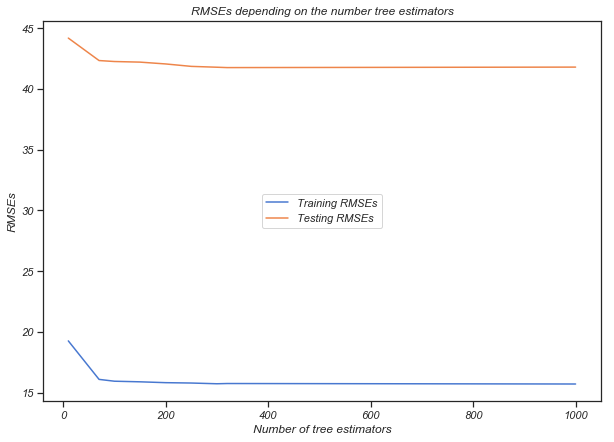

In [278]:
plt.figure(figsize=(10,7))
plt.plot(n_estimator_list_rfr_3, rmse_rfr_2_train_nestimators,
         label="Training RMSEs")
plt.plot(n_estimator_list_rfr_3, rmse_rfr_2_test_nestimators,
         label="Testing RMSEs")
plt.legend(loc="center")
plt.xlabel("Number of tree estimators")
plt.ylabel("RMSEs")
plt.title("RMSEs depending on the number tree estimators")
plt.show()

<p>
The best estimator is based on 302 trees with 41.75. However the
difference are rather small. There is a trade off between improvement
of the metric by training more trees and computational power, while
320 seem acceptable.
</p>
<p>
Also the conventional assumption is that the number of trees will not
overfit the data. This is comfirmed here as differences between
training and test RMSEs does not change much.
    
However there is a discussion on 
    
<a href='https://datascience.stackexchange.com/questions/19901/does-increasing-the-n-estimators-parameter-in-decision-trees-always-increase-acc'> Stackoverflow   </a>
against this based on the representativeness of the data.     
</p>

<p>
Further hyperparameter tuning is now carried out with grid search.
</p>

#### Data model 3 - Grid Search

#### Data model 3.1 
#### Randomized Parameter Optimization with RandomizedSearchCV

In [535]:
# Create variables for parameters

n_estimators_rands = \
[int(i) for i in np.linspace(start=100, stop=1000, num=10, 
                             endpoint=True)]
print(n_estimators_rands)

max_depth_rands = \
list(np.linspace(start=40, stop=100, num=6, endpoint=True, 
                 dtype='int'))
print(max_depth_rands)

min_samples_split_rands = \
list(np.linspace(start=2, stop=10, num=8, endpoint=True, 
                 dtype='int'))
print(min_samples_split_rands)

min_samples_leaf_rands = \
list(np.linspace(start=1, stop=15, num=15, endpoint=True, 
                 dtype='int'))

max_features_rands = ['auto', 'sqrt']
print(max_features_rands)

bootstrap_rands = ['True', 'False']
print(bootstrap_rands)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
[40, 52, 64, 76, 88, 100]
[2, 3, 4, 5, 6, 7, 8, 10]
['auto', 'sqrt']
['True', 'False']


In [536]:
# Create a param grid for the Randomized Parameter Optimization

param_grid_randomized_search = {
    
    'n_estimators' : n_estimators_rands,
    'max_depth' : max_depth_rands,
     #'min_samples_split' : min_samples_split_rands,
    'min_samples_leaf' : min_samples_leaf_rands,
    'max_features' : max_features_rands,
    'bootstrap' : bootstrap_rands
    
}

param_grid_randomized_search.keys()

dict_keys(['n_estimators', 'max_depth', 'min_samples_leaf', 'max_features', 'bootstrap'])

In [537]:
# This randomized parameter optimization is using a base model
# random forest regressor
# Instantiate the estimator

rfr_rs = RandomForestRegressor()

In [538]:
# from doc
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#sklearn.model_selection.RandomizedSearchCV
# class sklearn.model_selection.RandomizedSearchCV(estimator, 
# param_distributions, n_iter=10, scoring=None, n_jobs=None, 
# iid=’warn’, refit=True, cv=’warn’, verbose=0, pre_dispatch=‘2*n_jobs’, random_state=None, error_score=’raise-deprecating’, 
# return_train_score=False)[source]

randomized_scv_rfr = \
RandomizedSearchCV(estimator=rfr_rs, 
                   param_distributions=param_grid_randomized_search,
                   n_iter = 100,
                   # n_iter : int, default=10
                   # Number of parameter settings that are sampled. 
                   # n_iter trades off runtime vs quality of 
                   # the solution.
                   cv = 3,
                   scoring = 'neg_mean_squared_error',
                   n_jobs = -1,
                   # Number of jobs to run in parallel. 
                   # -1 means using all processors.
                   random_state = 46
                  )





In [539]:
# Fit algorithm to the data
randomized_scv_rfr.fit(X_train_2, y_train_2)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_depth': [40, 52, 64, 76, 88, 100], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 'max_features': ['auto', 'sqrt'], 'bootstrap': ['True', 'False']},
          pre_dispatch='2*n_jobs', random_state=46, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [540]:
bindex=randomized_scv_rfr.best_index_ 
bindex

38

In [541]:
randomized_cv_results = randomized_scv_rfr.cv_results_
df_randomized_cv_results = pd.DataFrame(randomized_cv_results)
df_randomized_cv_results.loc[bindex-3:bindex+1,:]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,params,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
35,10.476477,0.113167,0.860584,0.062627,900,11,sqrt,76,False,"{'n_estimators': 900, 'min_samples_leaf': 11, ...",...,-5780.897898,-5939.376095,-5859.152466,64.711104,85,-4857.897438,-4716.403775,-4823.044272,-4799.115162,60.191726
36,9.721292,0.196259,0.271164,0.029470,300,14,auto,40,True,"{'n_estimators': 300, 'min_samples_leaf': 14, ...",...,-2836.198573,-3374.299433,-3136.971505,224.204114,45,-2437.423488,-2427.823458,-2551.414721,-2472.220556,56.135711
37,37.925148,0.392712,1.015542,0.097678,1000,10,auto,76,True,"{'n_estimators': 1000, 'min_samples_leaf': 10,...",...,-2501.457285,-3020.495030,-2791.935443,216.363910,31,-1987.024806,-1969.237070,-2092.456515,-2016.239464,54.380634
38,42.254873,0.351506,1.505054,0.414536,600,1,auto,40,False,"{'n_estimators': 600, 'min_samples_leaf': 1, '...",...,-1881.689877,-2185.433396,-2029.979799,124.101713,1,-263.621284,-267.207272,-275.280458,-268.703005,4.875927
39,1.739946,0.247209,0.147264,0.031716,100,2,sqrt,100,False,"{'n_estimators': 100, 'min_samples_leaf': 2, '...",...,-3837.314677,-3701.452542,-3777.195631,56.552875,60,-1452.982475,-1429.557513,-1436.921408,-1439.820465,9.780444


In [523]:
randomized_scv_rfr.n_splits_

3

In [542]:
randomized_scv_rfr.refit_time_

53.78627347946167

In [543]:
randomized_scv_rfr.scorer_ 


make_scorer(mean_squared_error, greater_is_better=False)

In [544]:
randomized_scv_rfr.best_params_


{'n_estimators': 600,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 40,
 'bootstrap': 'False'}

In [545]:
randomized_scv_rfr_best_estimator = randomized_scv_rfr.best_estimator_
print(randomized_scv_rfr_best_estimator)

RandomForestRegressor(bootstrap='False', criterion='mse', max_depth=40,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


In [546]:
mse_randomized_scv_rfr = randomized_scv_rfr.best_score_ 
print(mse_randomized_scv_rfr)
rmse_randomized_scv_rfr = round(np.sqrt(abs(mse_randomized_scv_rfr)),2)
print(rmse_randomized_scv_rfr)


-2029.979799439309
45.06


In [547]:
predictions_rand_cv_rfr = randomized_scv_rfr.predict(X_test_2)
print([i for i in predictions_rand_cv_rfr[[10,12,100,1002, 2989]]])
print([predictions_rand_cv_rfr[i] for i in [10,12,100,1002, 2989]])
print(predictions_rand_cv_rfr[12])

[18.246666666666666, 589.6066666666667, 57.49, 228.605, 37.255]
[18.246666666666666, 589.6066666666667, 57.49, 228.605, 37.255]
589.6066666666667


In [548]:
mse_rand_cv_rfr_2 = mean_squared_error(y_test_2, 
                                       predictions_rand_cv_rfr)
print(mse_rand_cv_rfr_2 )

1737.674642353517


In [549]:
rmse_rand_cv_rfr_2 = round(np.sqrt(mse_rand_cv_rfr_2), 2)
print(rmse_rand_cv_rfr_2)

41.69


#### Creating a data model with the best estimator of the RandomSearchCV - randomized_scv_rfr as test

In [550]:
randomized_scv_rfr_best_estimator.fit(X_train_2, y_train_2)

RandomForestRegressor(bootstrap='False', criterion='mse', max_depth=40,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [532]:
# Call predict on the estimator with the best found parameters.
predictions_randscv_best_estimator =\
randomized_scv_rfr_best_estimator.predict(X_test_2)
print(predictions_randscv_best_estimator[:5])

[389.39728421  97.39732576  10.46969204 525.73665969  13.39526694]


In [533]:
mse_rand_cv_rfr_3 = mean_squared_error(y_test_2, predictions_randscv_best_estimator)
print(mse_rand_cv_rfr_3)
rmse_rand_cv_rfr_3 = round(np.sqrt(mse_rand_cv_rfr_3),2)
print(rmse_rand_cv_rfr_3)

2022.6192604361747
44.97


In [555]:
new_row_10={"model":"random search cv 1", "rmse":rmse_rand_cv_rfr_2}
df_RMSEs_2 = df_RMSEs_2.append(new_row_10, ignore_index=True)

new_row_11={"model":"random best estimator", "rmse":rmse_rand_cv_rfr_3}
df_RMSEs_2 = df_RMSEs_2.append(new_row_11, ignore_index=True)


df_RMSEs_2.sort_values(by='rmse', ascending=True)

,model,rmse
20,random search cv 1,41.690000
18,random search cv 1,41.690000
22,random search cv 1,41.690000
10,rf hyper nest 150,41.730000
11,random search cv 1,41.950000
14,random search cv 1,41.950000
12,random search cv 1,41.950000
15,random best estimator,42.160000
13,random best estimator,42.160000
9,random forest base,44.080000


<p>
The randomized grid search did improved the rmse only slightly
with 41.69. One option here is to increase n_iter but this would lead to higher computation time or need for more power.
That is why this path is not choosen here at least at the moment.
</p>
<p>
However in combination with the trials before there are some 
intuitions about possible improvements.For example it seems 
the number of trees is of importants and increasing max depths leads
to better results. These "intuitions" are now used for an
exhaustive grid search model with a smaller amount of parameter values.
</p>

#### Data model 3.2 
#### Exhaustive Parameter Optimization with GridSearchCV

In [581]:
# Create the parameter grid based on the results of random search 
# max depth is increase here greatly, this is a kind of
# brute force method

param_grid_gridsearch = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110 ],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 1000]
}

In [582]:
# Create a based model
rfr_gridsearch = RandomForestRegressor()
# Instantiate the grid search model
grid_search_rfr = \
GridSearchCV(estimator = rfr_gridsearch, 
             param_grid = param_grid_gridsearch, 
             cv = 3, n_jobs = -1, verbose = 2)

In [583]:
grid_search_rfr.fit(X_train_2, y_train_2)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 20.1min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 35.8min
[Parallel(n_jobs=-1)]: Done 648 out of 648 | elapsed: 36.3min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110], 'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5], 'min_samples_split': [8, 10, 12], 'n_estimators': [100, 200, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [585]:
grid_search_rfr.best_params_

{'bootstrap': True,
 'max_depth': 110,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 200}

In [586]:
grid_search_rfr_best_estimator = \
grid_search_rfr.best_estimator_

In [587]:
# r-squared
# variability in the target variable explained by the features
grid_search_rfr.best_score_

0.8765521329743232

In [588]:
grid_search_rfr.best_index_

190

In [589]:
grid_search_rfr_cv_results = grid_search_rfr.cv_results_
df_grid_search_rfr_cv_results = \
pd.DataFrame(grid_search_rfr_cv_results)
df_grid_search_rfr_cv_results.loc[grid_search_rfr.best_index_ -2: 
                                  grid_search_rfr.best_index_ + 1,:]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
188,17.757364,0.295226,1.980777,0.068453,True,110,2,5,12,1000,...,0.810127,0.812500,0.809659,0.002532,194,0.863016,0.863698,0.860049,0.862254,0.001584
189,2.482985,0.125778,0.208908,0.008449,True,110,3,3,8,100,...,0.873563,0.871506,0.872451,0.000848,14,0.932320,0.930557,0.924955,0.929277,0.003140
190,5.170292,0.216054,0.394755,0.035792,True,110,3,3,8,200,...,0.876909,0.879421,0.876552,0.002501,1,0.933187,0.933621,0.930841,0.932550,0.001221
191,25.384857,0.352844,2.435919,0.130389,True,110,3,3,8,1000,...,0.873591,0.879004,0.875421,0.002534,4,0.932740,0.931536,0.929993,0.931423,0.001124


In [590]:
# Call predict on the estimator with the best found parameters.
predictions_grid_search = grid_search_rfr.predict(X_test_2)
[predictions_grid_search[i] for i in [1,2,190, 2010, 2500]]

[95.11521864758052,
 13.71898912035677,
 75.8830328676462,
 459.66535454031384,
 177.8502907704418]

In [591]:
mse_grid_search = mean_squared_error(y_test_2, predictions_grid_search)
print(mse_grid_search)

3184.7792080664926


In [592]:
rmse_grid_search = np.sqrt(mse_grid_search)
print(rmse_grid_search)

56.43384807069683


In [593]:

new_row_12={"model":"exhaustive grid search", "rmse":rmse_grid_search }
df_RMSEs_2 = df_RMSEs_2.append(new_row_12, ignore_index=True)

df_RMSEs_2.sort_values(by='rmse', ascending=True)

,model,rmse
20,random search cv 1,41.690000
22,random search cv 1,41.690000
18,random search cv 1,41.690000
10,rf hyper nest 150,41.730000
14,random search cv 1,41.950000
12,random search cv 1,41.950000
11,random search cv 1,41.950000
13,random best estimator,42.160000
15,random best estimator,42.160000
9,random forest base,44.080000


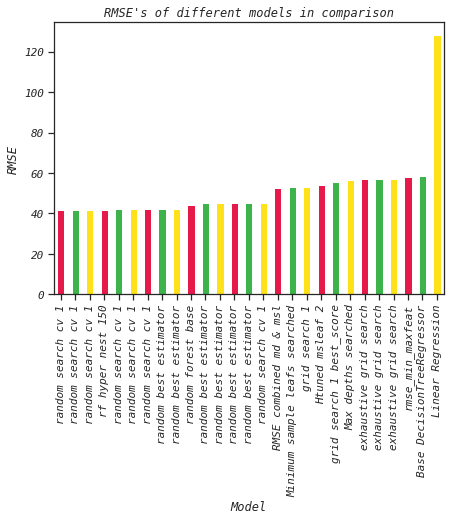

In [584]:
df_RMSEs_2.sort_values(by='rmse').plot(kind="bar", x='model', y='rmse', figsize=(7,5),
                title="RMSE's of different models in comparison", 
                color=['#e6194b', '#3cb44b', '#ffe119'],
                legend=False)
plt.xlabel("Model")
plt.ylabel("RMSE")
plt.show()

There are several option to tweak the models further. 
Also it is an option to change to other algorithms.
However at this moment the best rmse is delivered by the random search cv 1 with 41.690000. 